# Import modules

In [1]:
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
import seaborn as sns

# Reading and Cleaning Data


### Reading the Dataset 

In [4]:
train= pd.read_csv("new model\\datasets\\train.csv")
test= pd.read_csv("new model\\datasets\\test.csv")

### Display first 3 columns of train and test

In [14]:
display(train.iloc[0:3, :])

srch_id            date_time  site_id  visitor_location_country_id  \
0        1  2013-04-04 08:32:15       12                          187   
1        1  2013-04-04 08:32:15       12                          187   
2        1  2013-04-04 08:32:15       12                          187   

   visitor_hist_starrating  visitor_hist_adr_usd  prop_country_id  prop_id  \
0                      NaN                   NaN              219      893   
1                      NaN                   NaN              219    10404   
2                      NaN                   NaN              219    21315   

   prop_starrating  prop_review_score  ...  comp6_rate_percent_diff  \
0                3                3.5  ...                      NaN   
1                4                4.0  ...                      NaN   
2                3                4.5  ...                      NaN   

   comp7_rate  comp7_inv  comp7_rate_percent_diff  comp8_rate  comp8_inv  \
0         NaN        NaN                      NaN         0.0        0.0   
1         NaN        NaN                      NaN         0.0        0.0   
2         NaN        NaN                      NaN         0.0        0.0   

   comp8_rate_percent_diff  click_bool  gross_bookings_usd  booking_bool  
0                      NaN           0                 NaN             0  
1                      NaN           0                 NaN             0  
2                      NaN           0                 NaN             0  

[3 rows x 54 columns]

In [15]:
display(test.iloc[0:3, :])

srch_id            date_time  site_id  visitor_location_country_id  \
0        1  2013-02-02 15:27:40       24                          216   
1        1  2013-02-02 15:27:40       24                          216   
2        1  2013-02-02 15:27:40       24                          216   

   visitor_hist_starrating  visitor_hist_adr_usd  prop_country_id  prop_id  \
0                      NaN                   NaN              219     3180   
1                      NaN                   NaN              219     5543   
2                      NaN                   NaN              219    14142   

   prop_starrating  prop_review_score  ...  comp5_rate_percent_diff  \
0                3                4.5  ...                      NaN   
1                3                4.5  ...                      NaN   
2                2                3.5  ...                     10.0   

   comp6_rate  comp6_inv  comp6_rate_percent_diff  comp7_rate  comp7_inv  \
0         NaN        NaN                      NaN         NaN        NaN   
1         NaN        NaN                      NaN         NaN        NaN   
2         NaN        NaN                      NaN         NaN        NaN   

   comp7_rate_percent_diff  comp8_rate  comp8_inv  comp8_rate_percent_diff  
0                      NaN         NaN        NaN                      NaN  
1                      NaN         NaN        NaN                      NaN  
2                      NaN         NaN        NaN                      NaN  

[3 rows x 50 columns]

### Get train and test shape

In [16]:
print(f"The train shape is {train.shape}")
print(f"The test shape is {test.shape}")

The train shape is (4958347, 54)
The test shape is (4959183, 50)


### Drop columns that only contain nans

In [17]:
train = train.dropna(axis=1,how="all")
test = test.dropna(axis=1,how="all")

#### Get info per column and write to excel

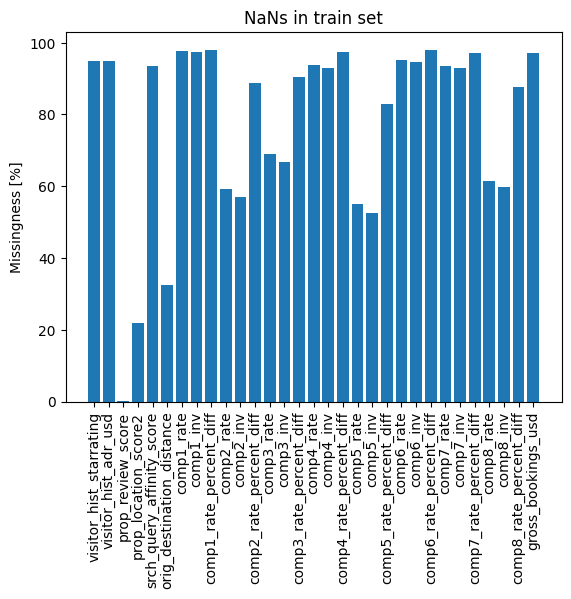

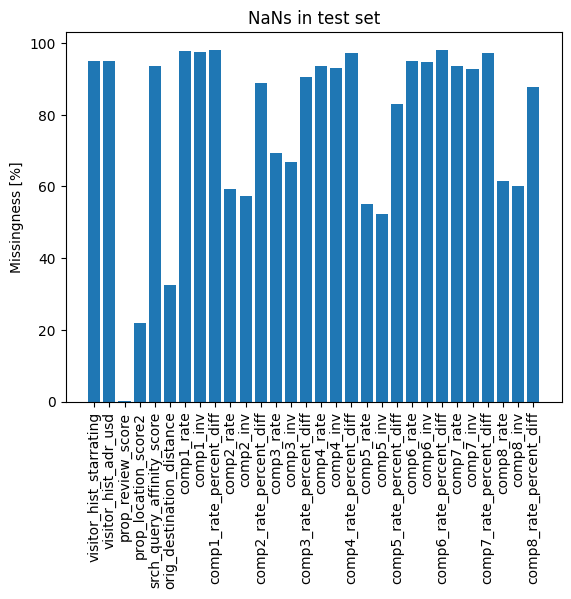

In [18]:
# Get some info
info = pd.DataFrame([])
info["min"] = train.min()
info["max"] = train.max()
info["unique"] = train.nunique()

# ---- Train and test
for idf, df in enumerate([train, test]):
    nans = df.isnull().sum()
    nans = nans / df.shape[0] * 100
    if idf == 0:
        info["nans"] = nans
        info.to_excel("info.xlsx")
    # Subselection
    nans = nans[nans > 0]
    # Plot
    plt.bar(nans.index, nans)
    plt.xticks(rotation = 90)
    # Set title
    if idf == 0:
        plt.title("NaNs in train set")
    else: plt.title("NaNs in test set")
    # Set ylabel
    plt.ylabel("Missingness [%]")
    # Show
    plt.show()



### Nans per column, more detailed

<Axes: >

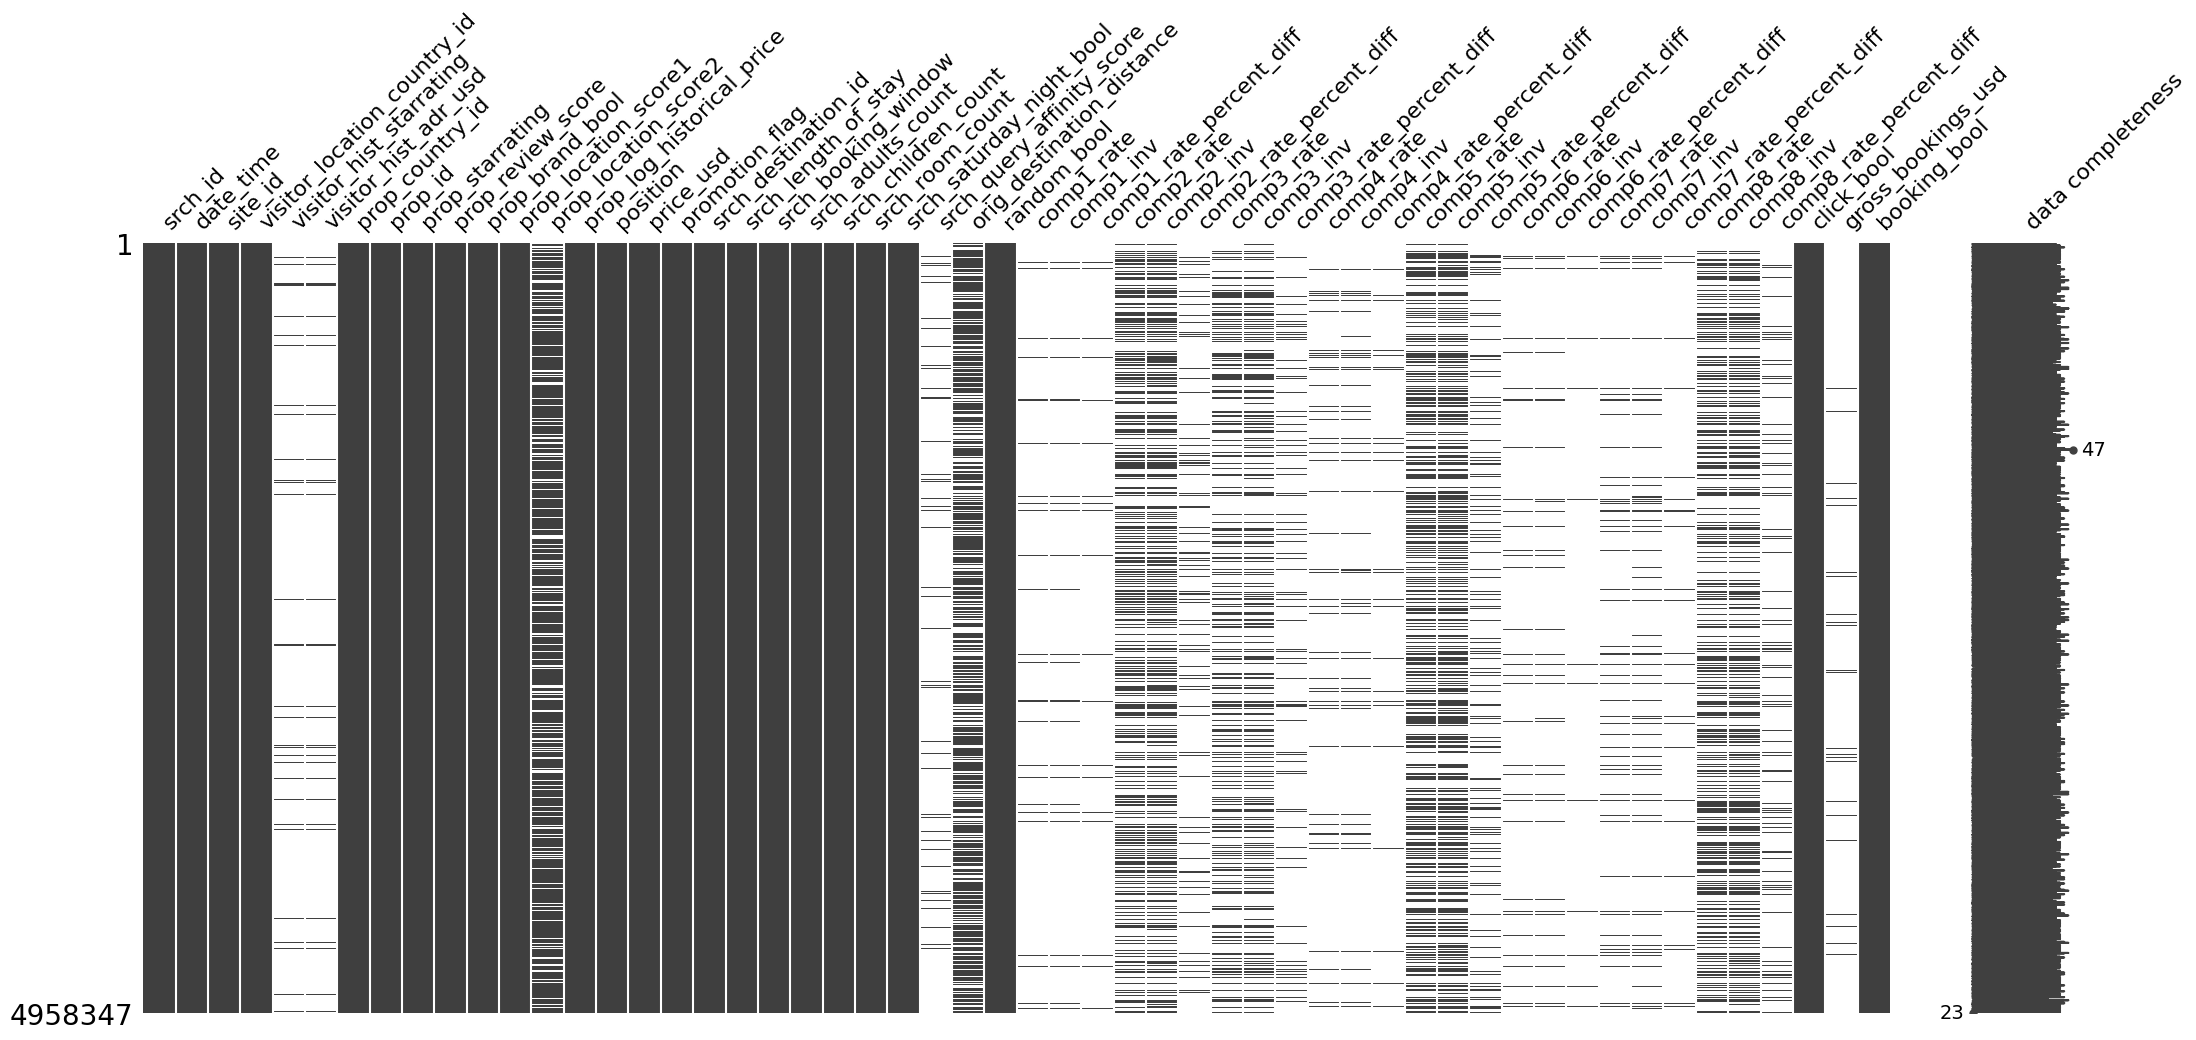

In [25]:
# Missingness matrix
msno.matrix(train, labels=True)

<Axes: >

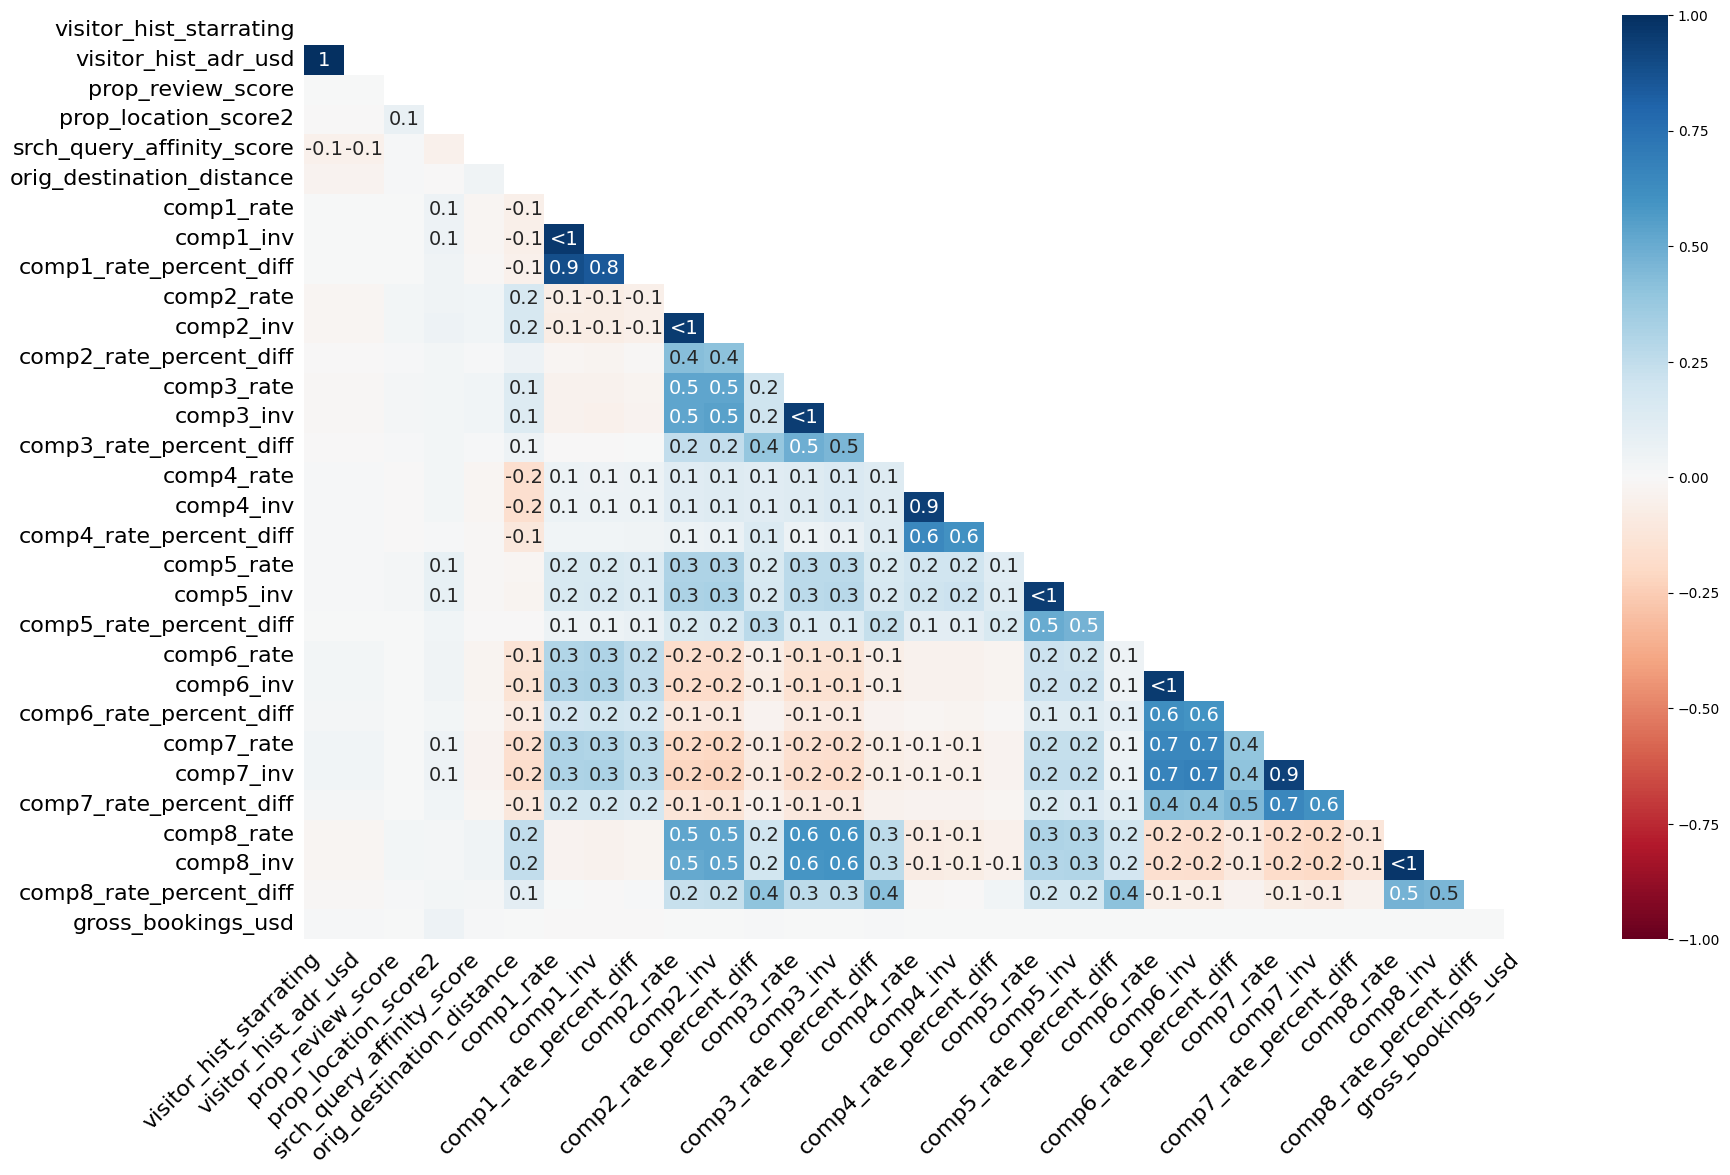

In [24]:
# Missingness Heatmap
msno.heatmap(train)

<Axes: >

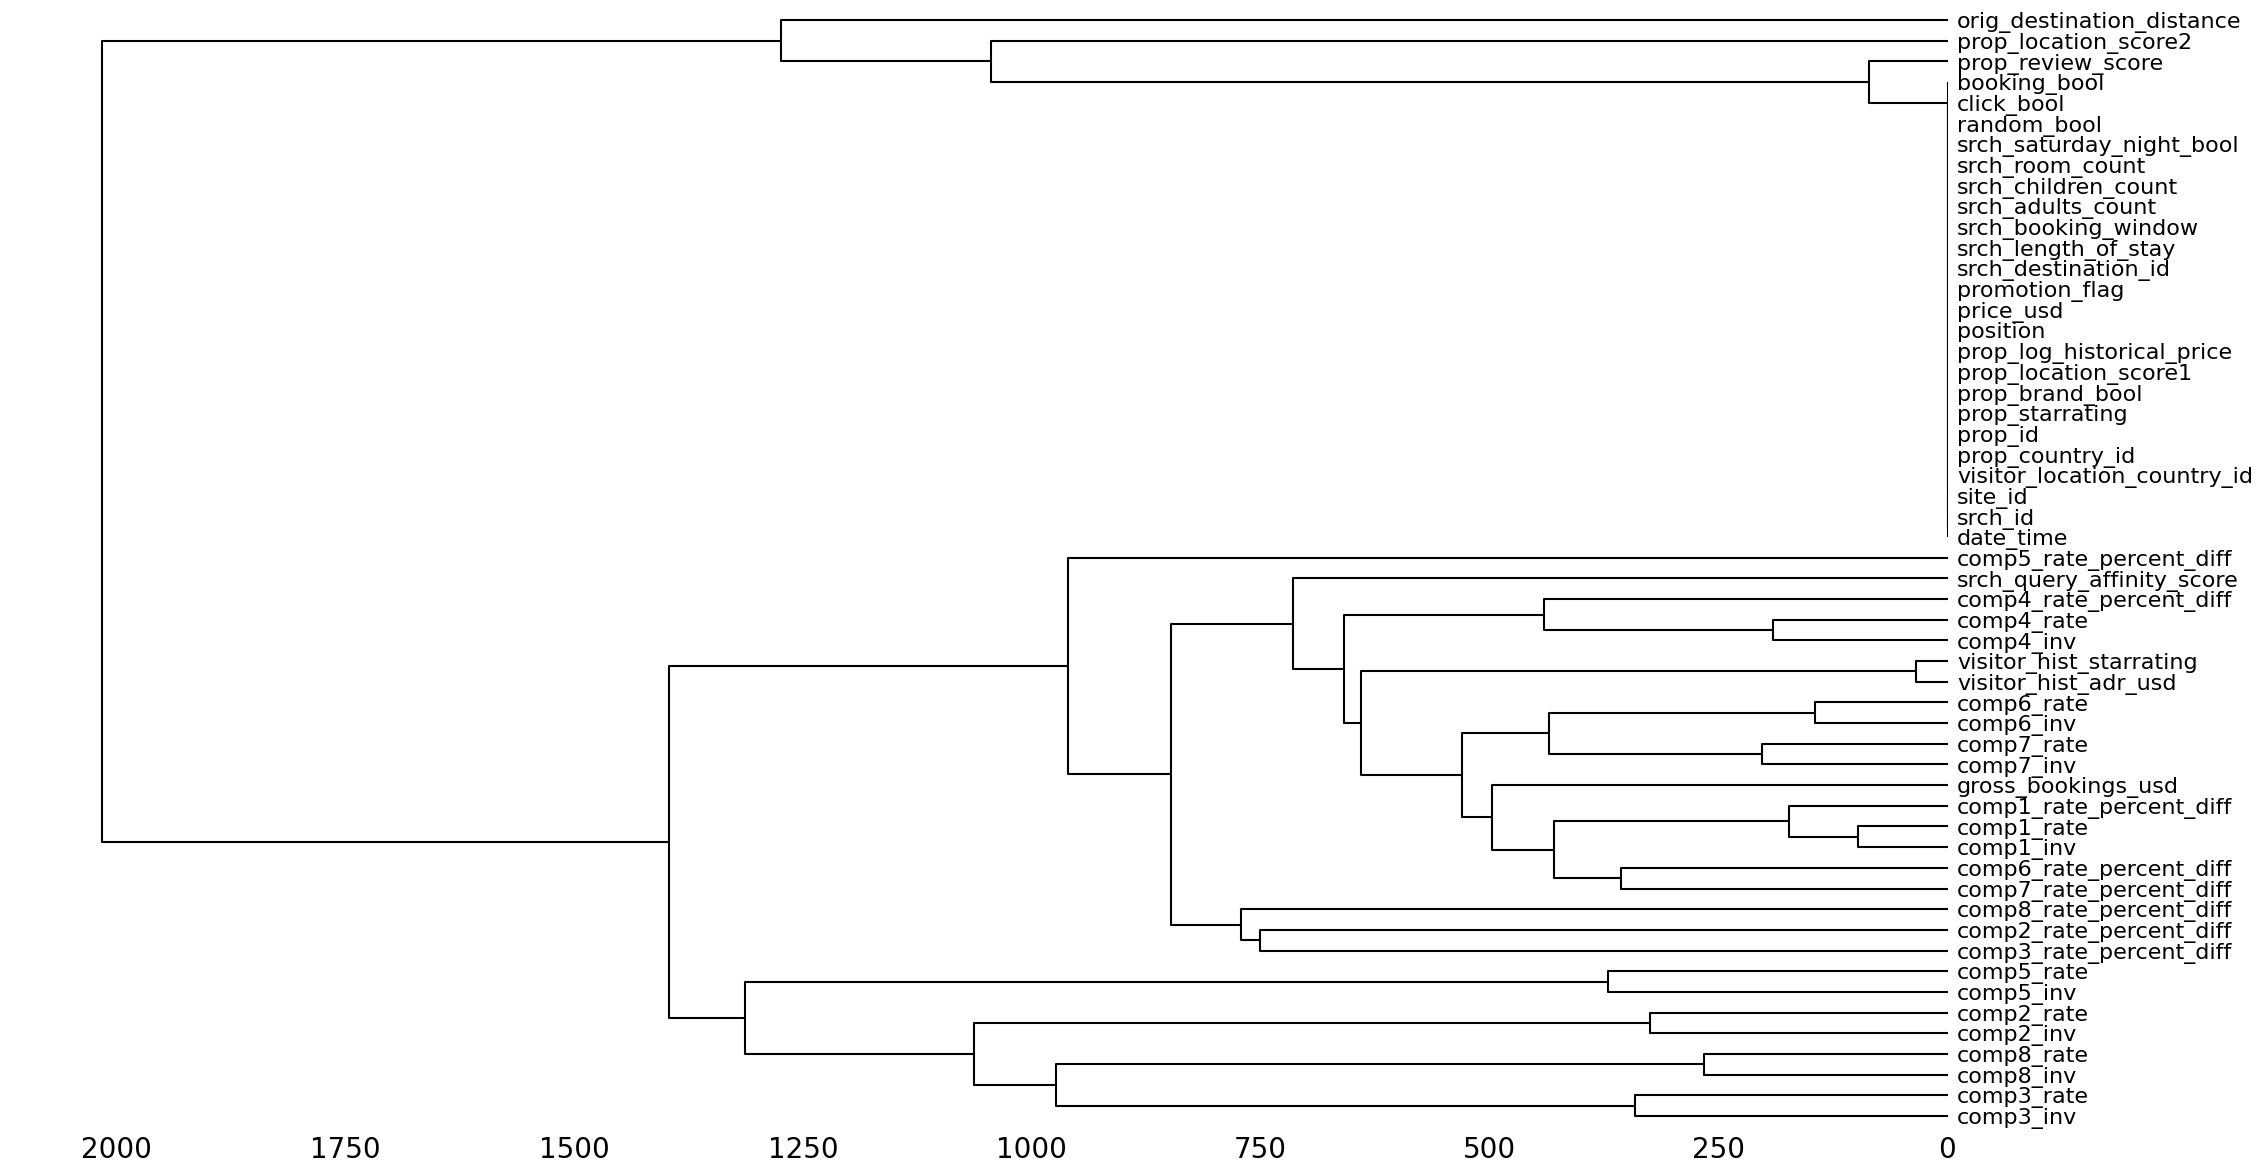

In [26]:
# Missingness dendogram
msno.dendrogram(train)

<Axes: ylabel='Frequency'>

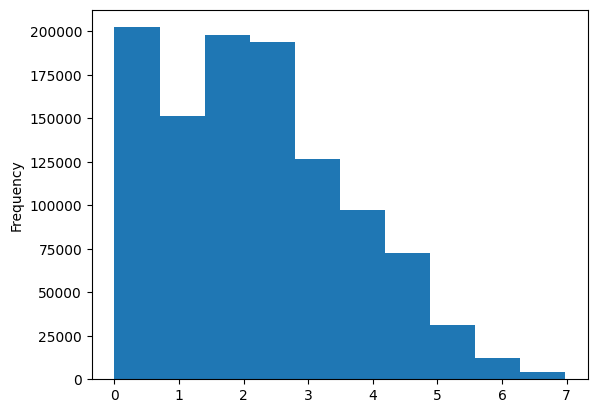

In [77]:
# # Hist star rating --> hist adr usd
# mask_nan = train["visitor_hist_starrating"].isna()
# masked = train[mask_nan]["visitor_hist_adr_usd"]
# print(f"{sum(masked.isna()) / masked.shape[0] * 100} % of visitor_hist_adr_usd is NaN when visitor_hist_starrating is NaN")
# print(f"{sum(~masked.isna())} of visitor_hist_adr_usd is not NaN when visitor_hist_starrating is NaN")

#prop_location_score2 --> prop_location_score1
mask_nan = train["prop_location_score2"].isna()
masked = train[mask_nan]["prop_location_score1"]
masked.plot.hist()

### Get datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4958347 entries, 0 to 4958346
Data columns (total 54 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   srch_id                      int64  
 1   date_time                    object 
 2   site_id                      int64  
 3   visitor_location_country_id  int64  
 4   visitor_hist_starrating      float64
 5   visitor_hist_adr_usd         float64
 6   prop_country_id              int64  
 7   prop_id                      int64  
 8   prop_starrating              int64  
 9   prop_review_score            float64
 10  prop_brand_bool              int64  
 11  prop_location_score1         float64
 12  prop_location_score2         float64
 13  prop_log_historical_price    float64
 14  position                     int64  
 15  price_usd                    float64
 16  promotion_flag               int64  
 17  srch_destination_id          int64  
 18  srch_length_of_stay          int64  
 19  

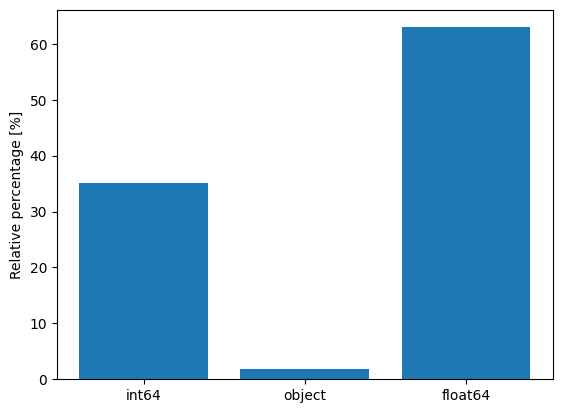

The columns that are object are Index(['date_time'], dtype='object')


In [19]:
# Get info
train.info()

# Get percentage of one datatype
dtypes = {}
for dtype in train.dtypes.unique():
    dtypes[str(dtype)] = sum(train.dtypes == dtype) / train.shape[1] * 100
plt.bar(dtypes.keys(), dtypes.values())
plt.ylabel("Relative percentage [%]")
plt.show()

# Display columns that are object
print(f"The columns that are object are {train.columns[train.dtypes == object]}")

Add descriptive statistics (lasts long ;) --> plot random sample)

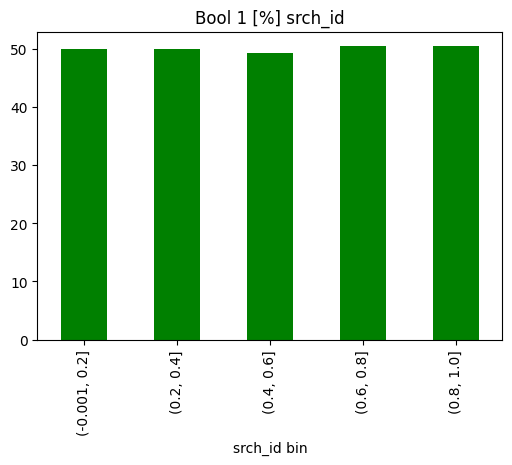

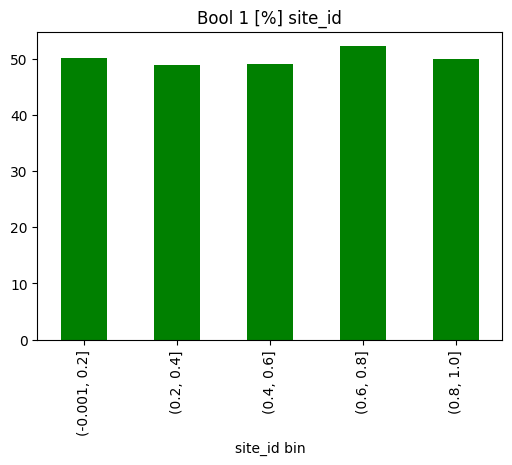

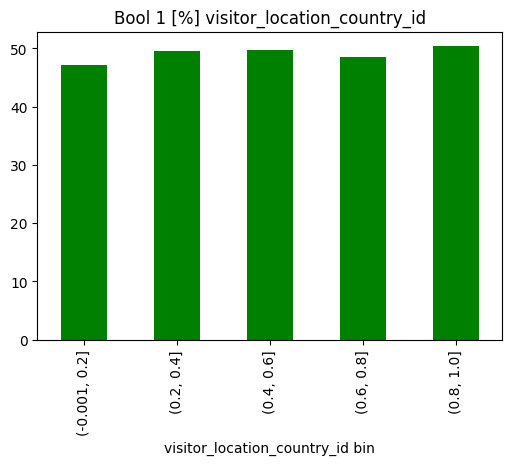

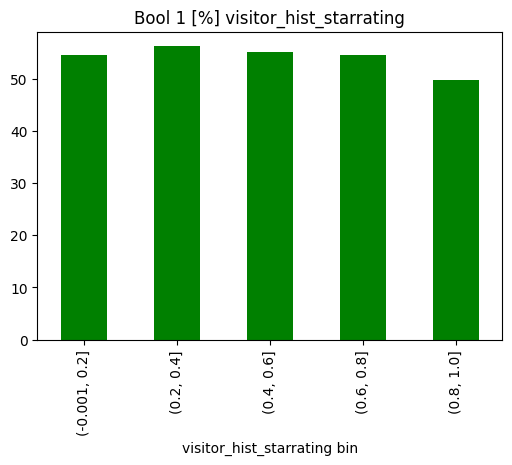

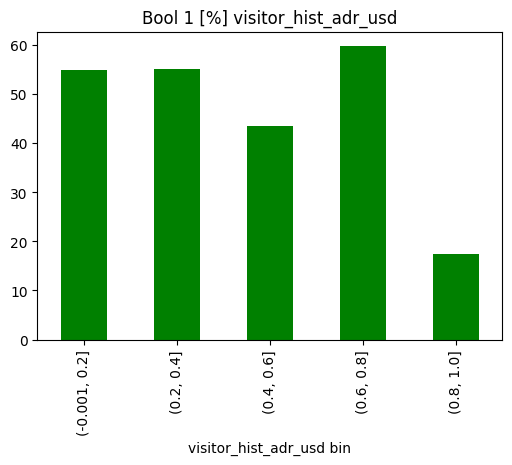

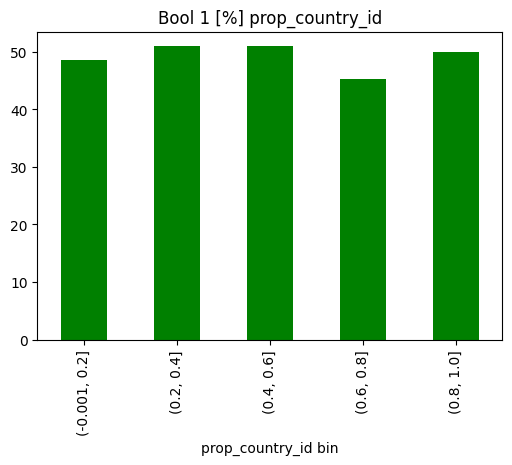

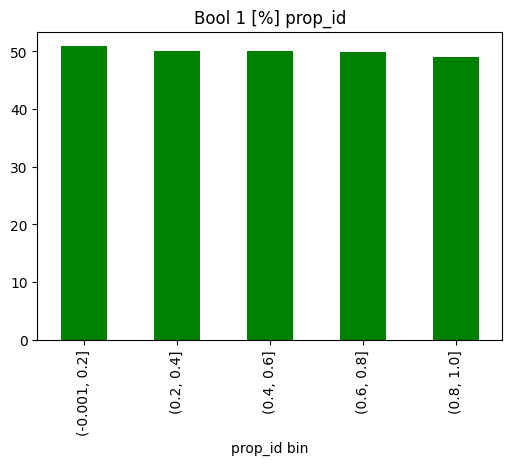

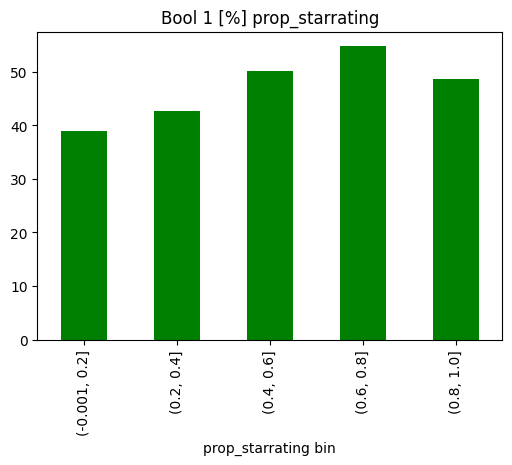

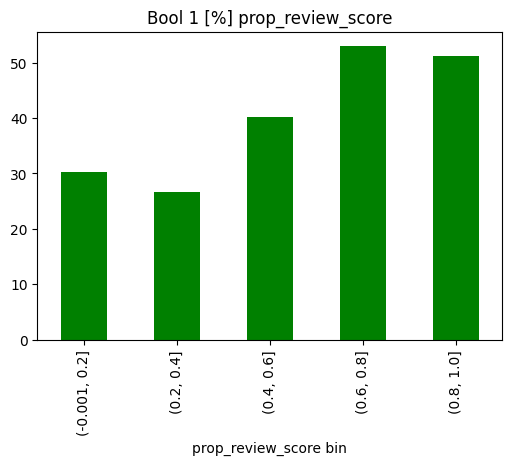

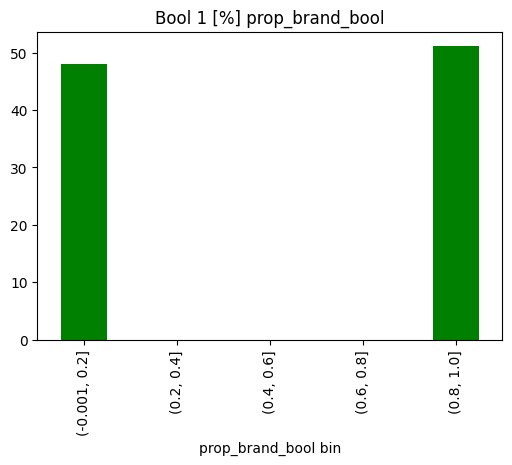

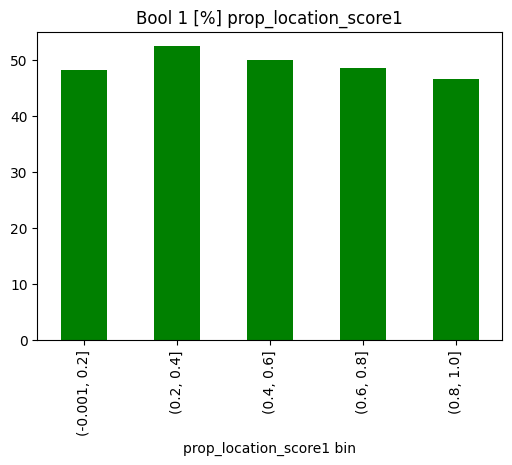

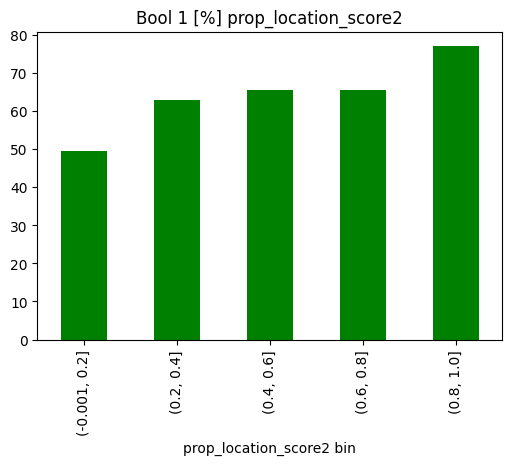

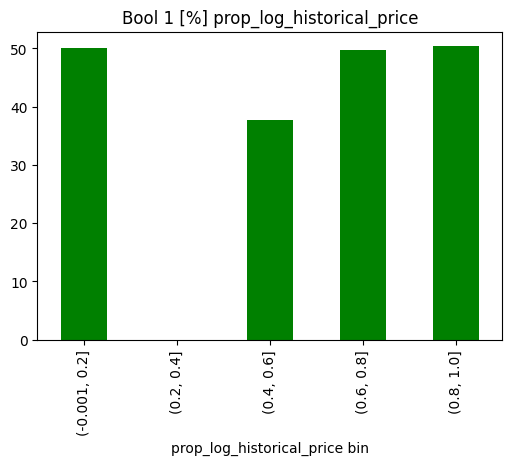

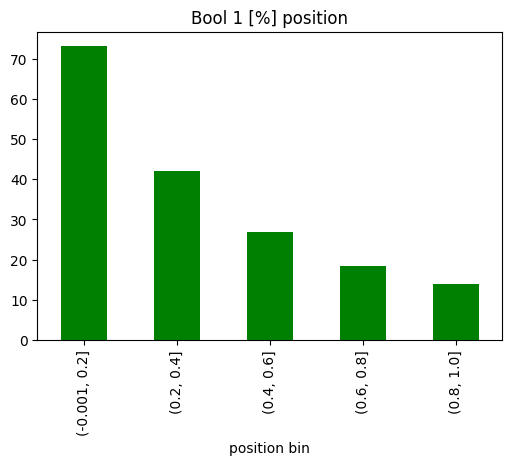

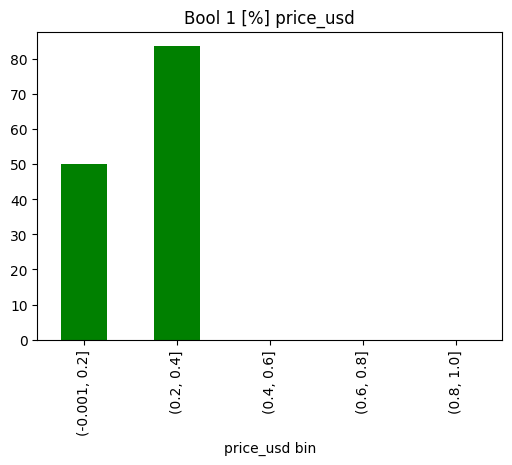

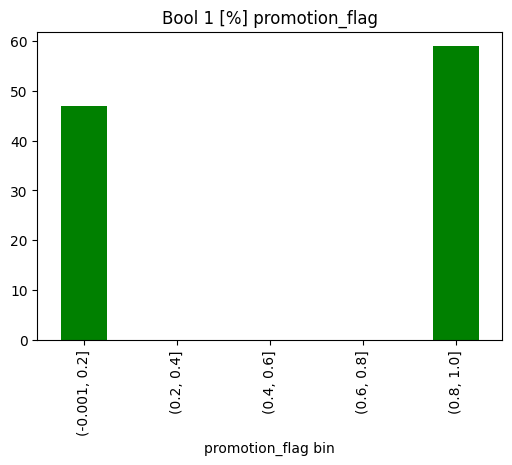

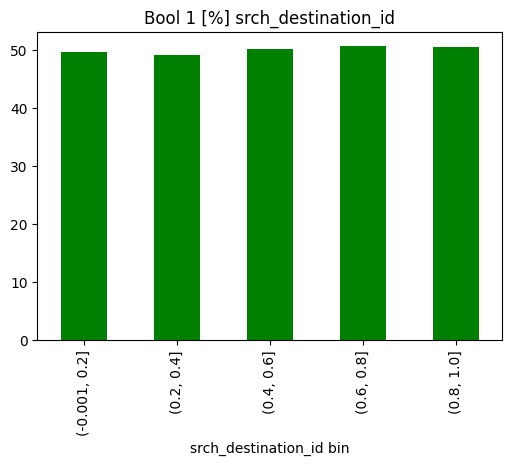

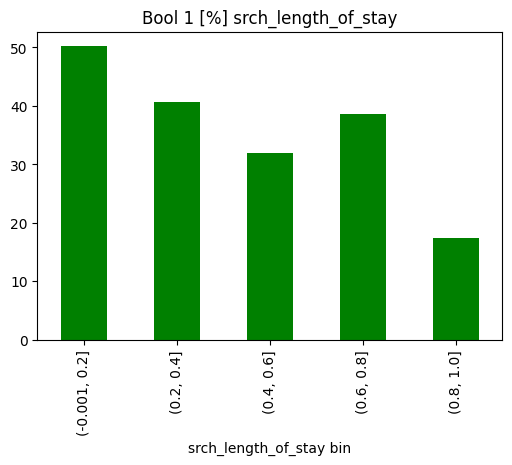

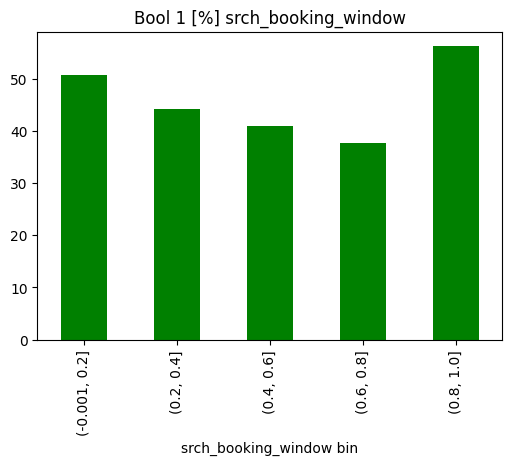

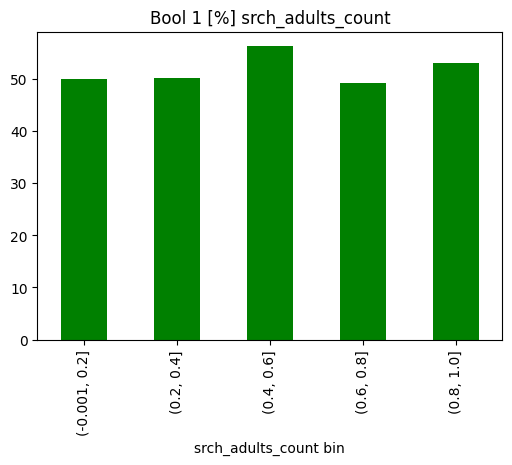

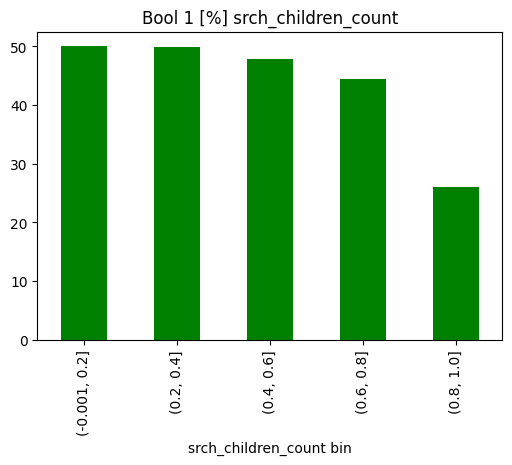

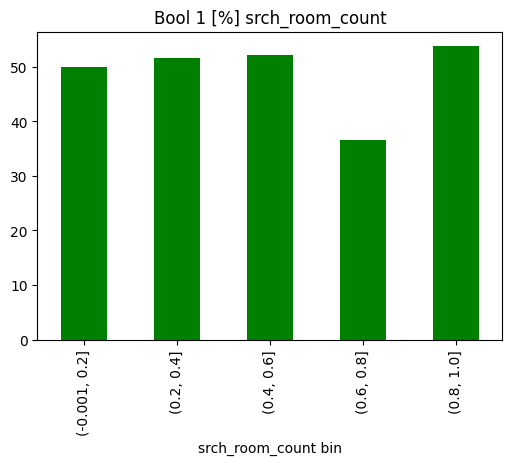

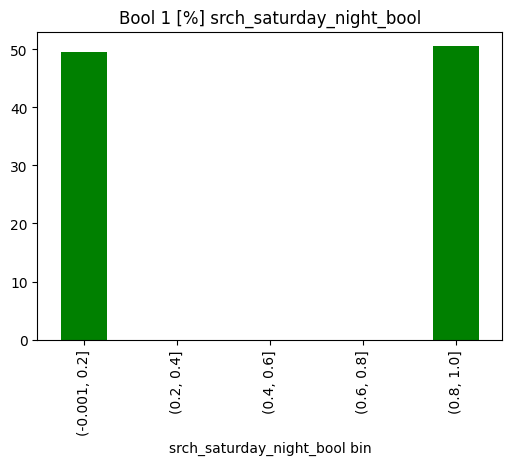

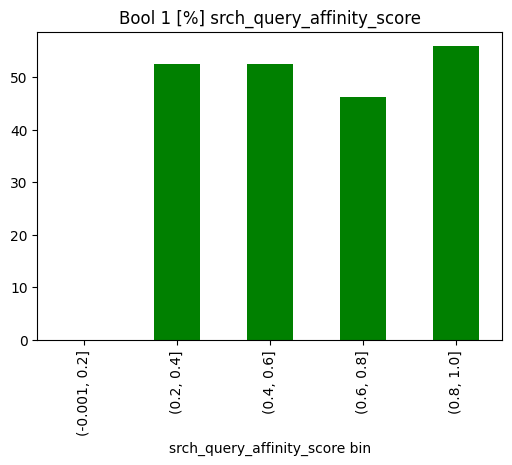

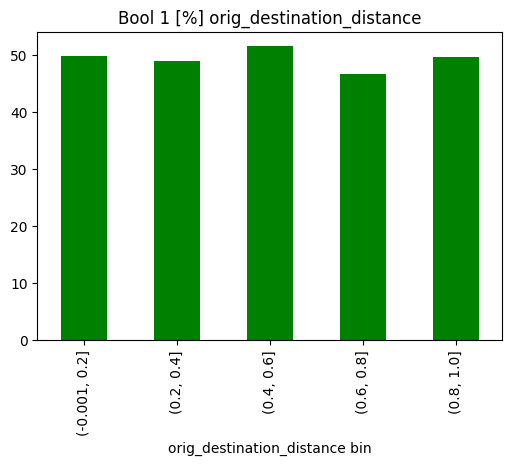

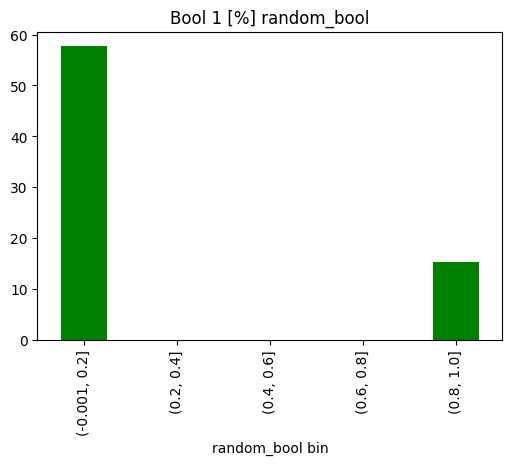

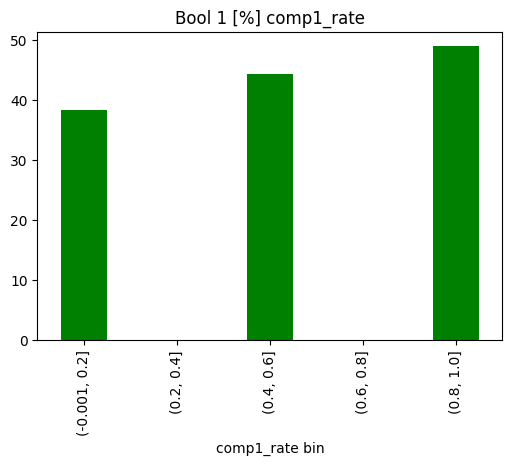

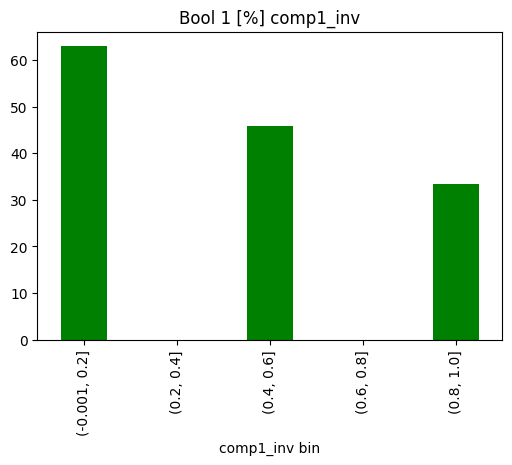

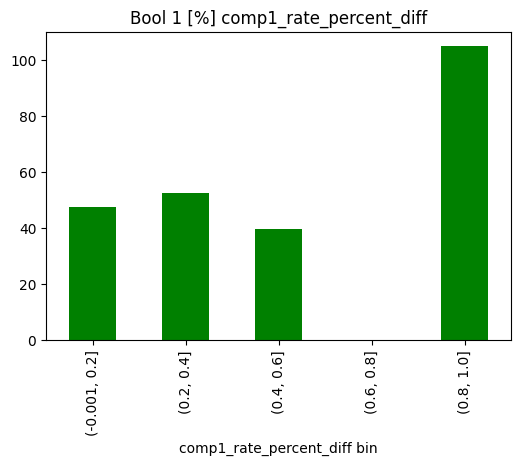

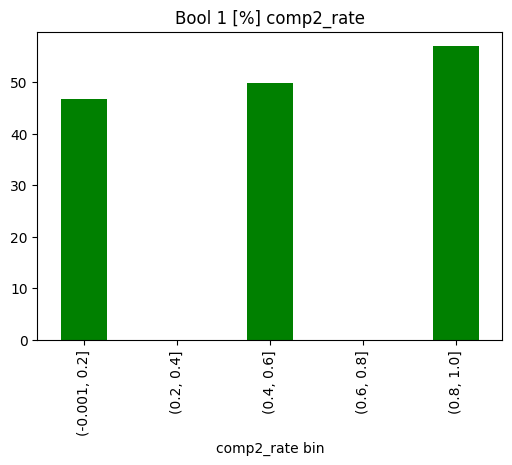

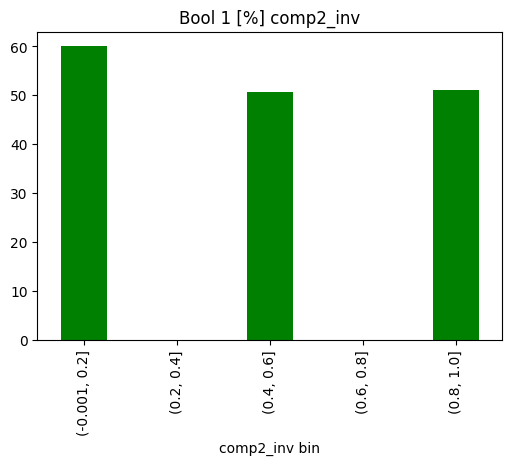

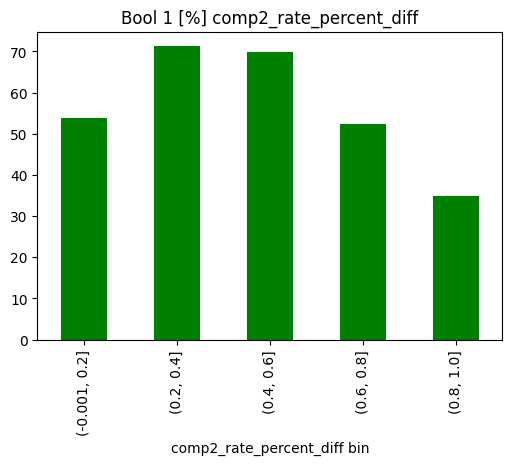

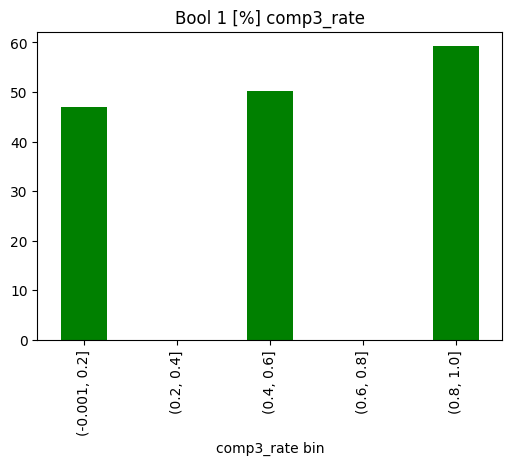

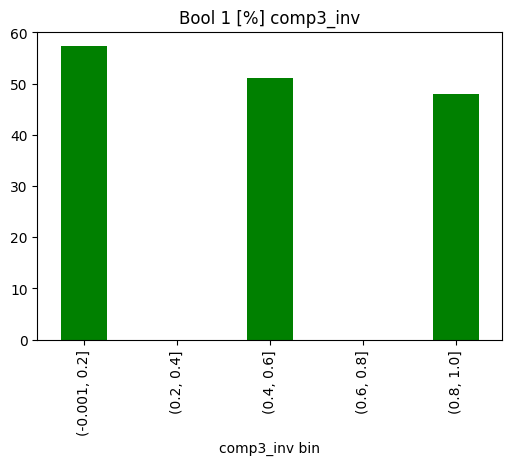

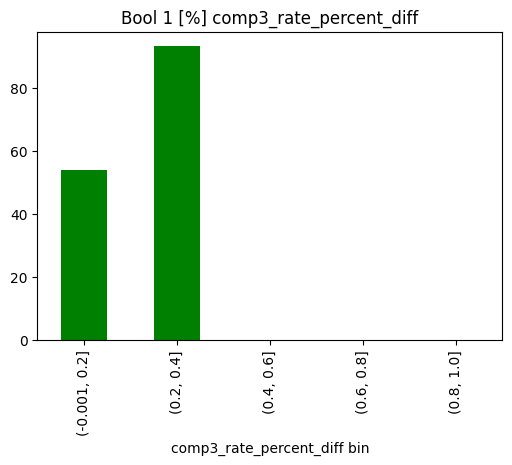

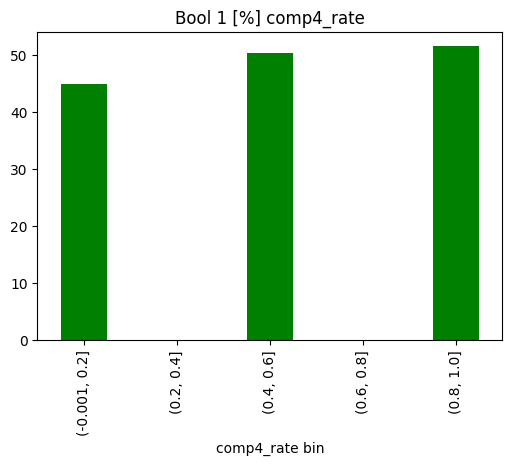

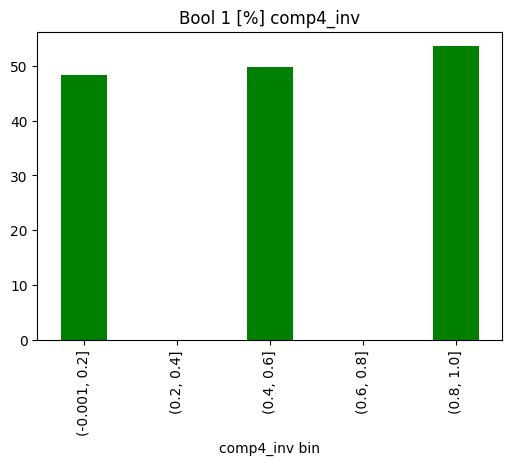

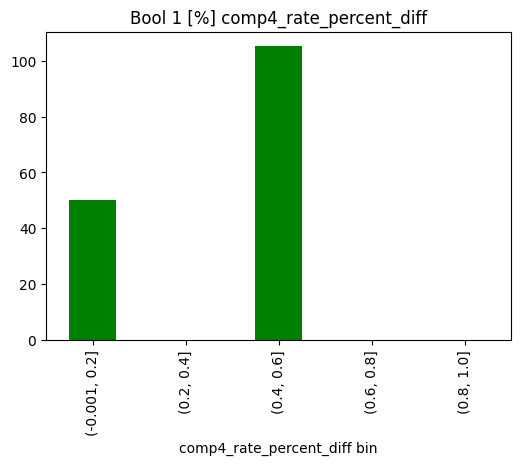

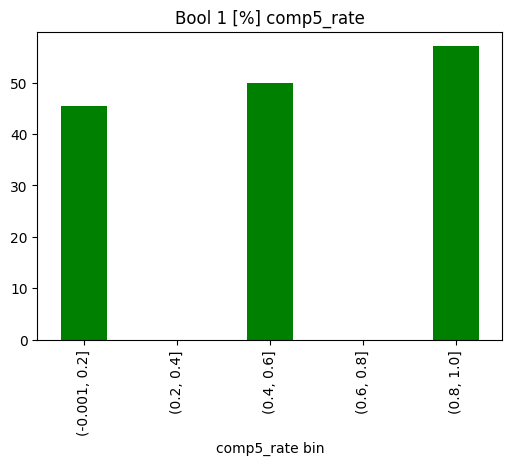

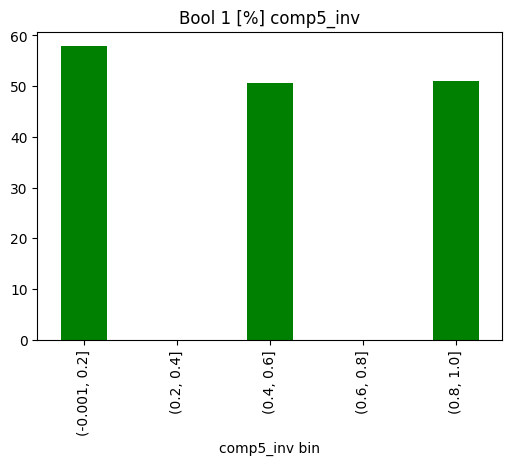

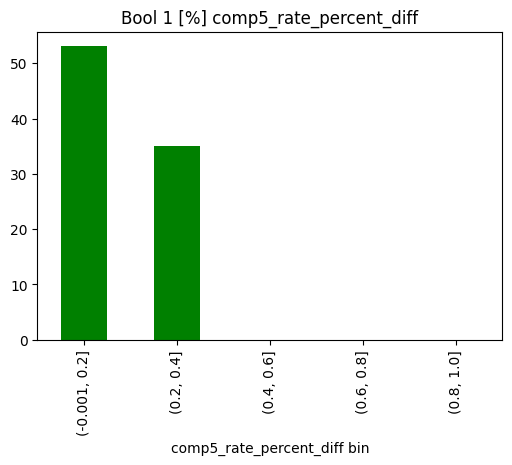

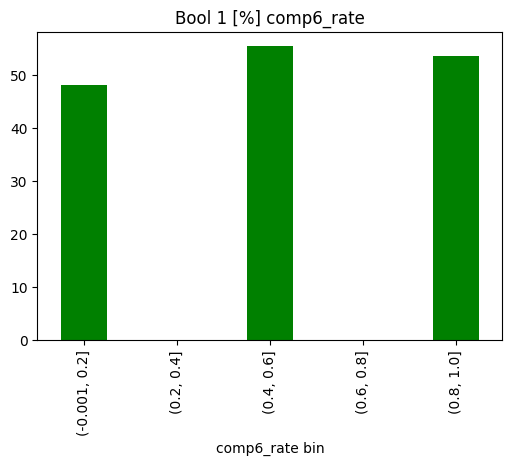

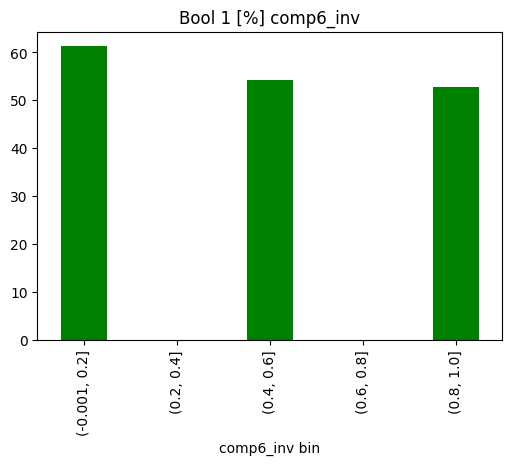

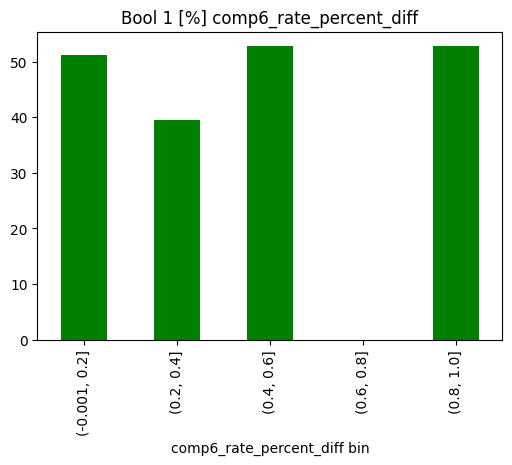

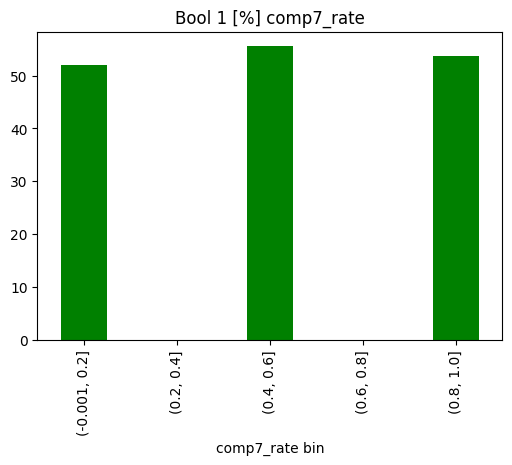

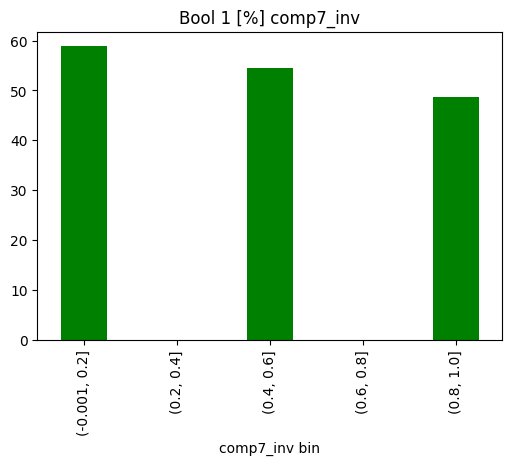

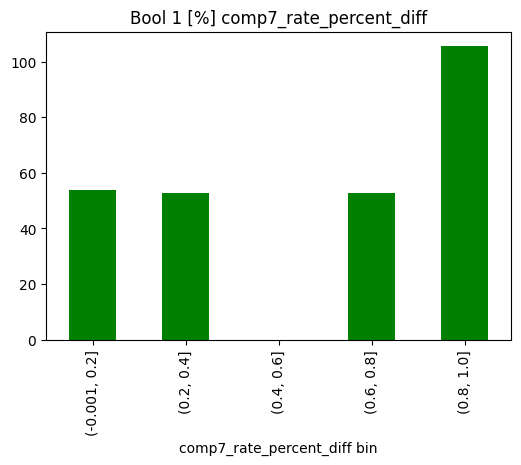

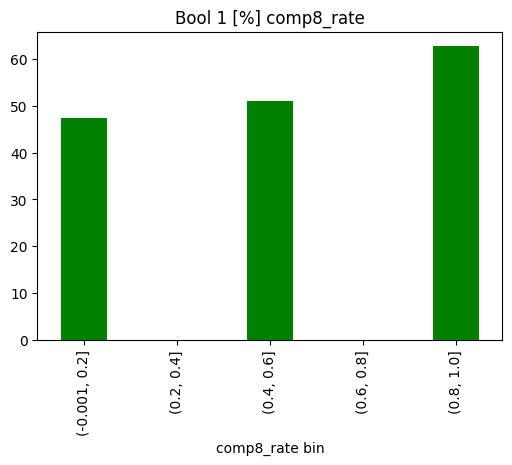

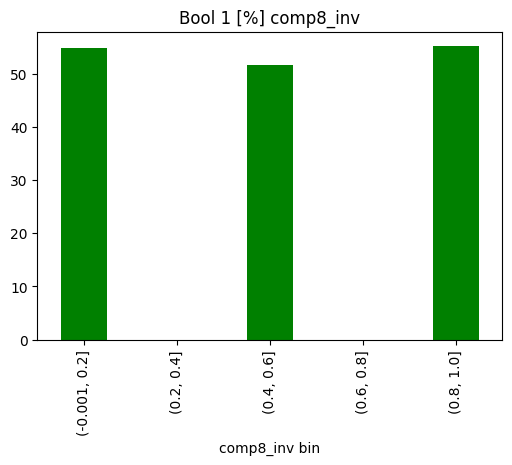

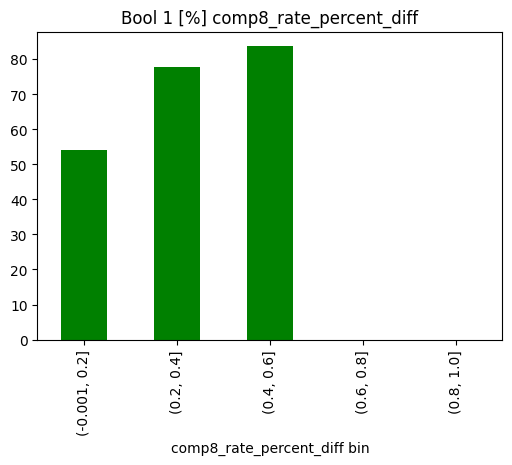

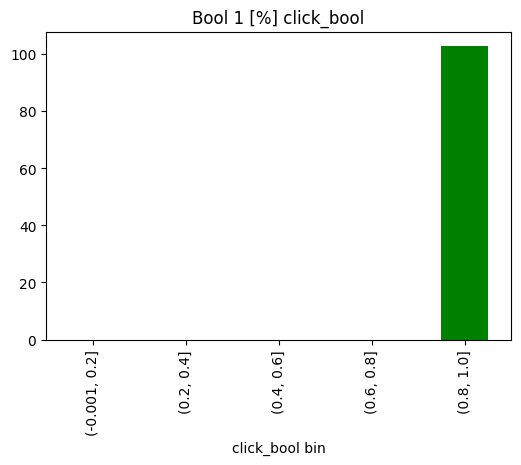

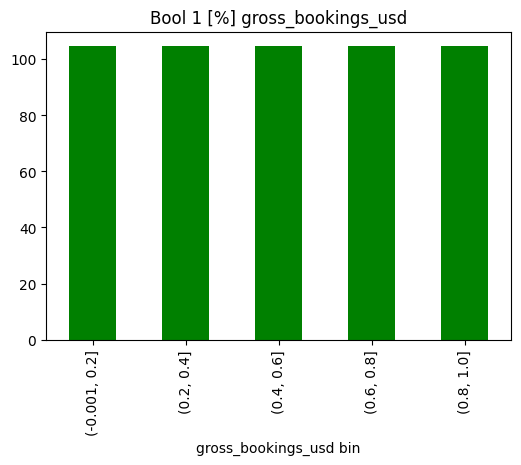

In [9]:
# Descpritive statistics
descriptives = train.describe()

#bools = "booking_bool", "promotion_flag", "srch_saturday_night_bool", "random_bool", "click_bool"
bool2group = "booking_bool" # --> select from above
goal = "histogram ratio" # histogram, histogram ratio or boxplot

def get_ratio(g):
    try:
        return g.loc[g[bool2group] == 1, :].shape[0] * (0.5 / ratio) / float(g.shape[0]) * 100
    except ZeroDivisionError:
        return np.nan

# Get boxplot of normalized data --> better display
def normalize(x):
    try:
        x = (x - x.min()) / (x.max() - x.min())
    except TypeError:
        pass
    return x

columns = train.columns
for icol in range(0, 9):
    cols = list(columns[int(0 + icol * 6):int(6 + icol * 6)])
    if bool2group in cols:
        cols.remove(bool2group)

    # Get proportions and weights
    train_norm = train[cols + [bool2group]]
    prop1 = sum(train_norm[bool2group] == 1) / train_norm.shape[0]
    weights = np.where(train_norm[bool2group] == 1, 1 / prop1, 1 / (1 - prop1))

    # Create figure
    if goal == "boxplot":
        # Boxplot
        train_norm = train_norm.sample(int(0.01 * train.shape[0]), weights = weights).apply(lambda x: normalize(x))
        train_norm.boxplot(by = bool2group, rot = 90, layout = (3, 3), figsize = (10, 10), fontsize = 8)
        # Plot
        plt.tight_layout() 
        plt.show()
    elif goal == "histogram":
        # Histogram
        train_norm = train_norm.sample(int(0.01 * train.shape[0]), weights = weights).apply(lambda x: normalize(x))
        for col in cols:
            if train_norm[col].dtype != object:
                train_norm.pivot(columns = bool2group)[col].plot(kind = "hist", bins = 5, stacked = True, title = col)
                plt.tight_layout() 
                plt.show()
    elif goal == "histogram ratio":
        # Histogram
        train_norm = train_norm.sample(int(0.01 * train.shape[0]), weights = weights).apply(lambda x: normalize(x))
        ratio = sum(train_norm["booking_bool"] == 1) / train_norm.shape[0]
        for col in cols:
            if train_norm[col].dtype != object:
                train_norm[col + " bin"] = pd.cut(train_norm[col], bins=5)
                data = train_norm.groupby(col + ' bin').apply(get_ratio)
                # Plot histogram
                data.plot.bar(color="g", figsize=(6,4), title = "Bool 1 [%] " + col, rot = 90)
                plt.show()



### Get correlations

C:\Users\niels\AppData\Local\Temp\ipykernel_19912\676492213.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(train.corr(), fignum=f.number)


Text(0.5, 1.0, 'Correlation Matrix')

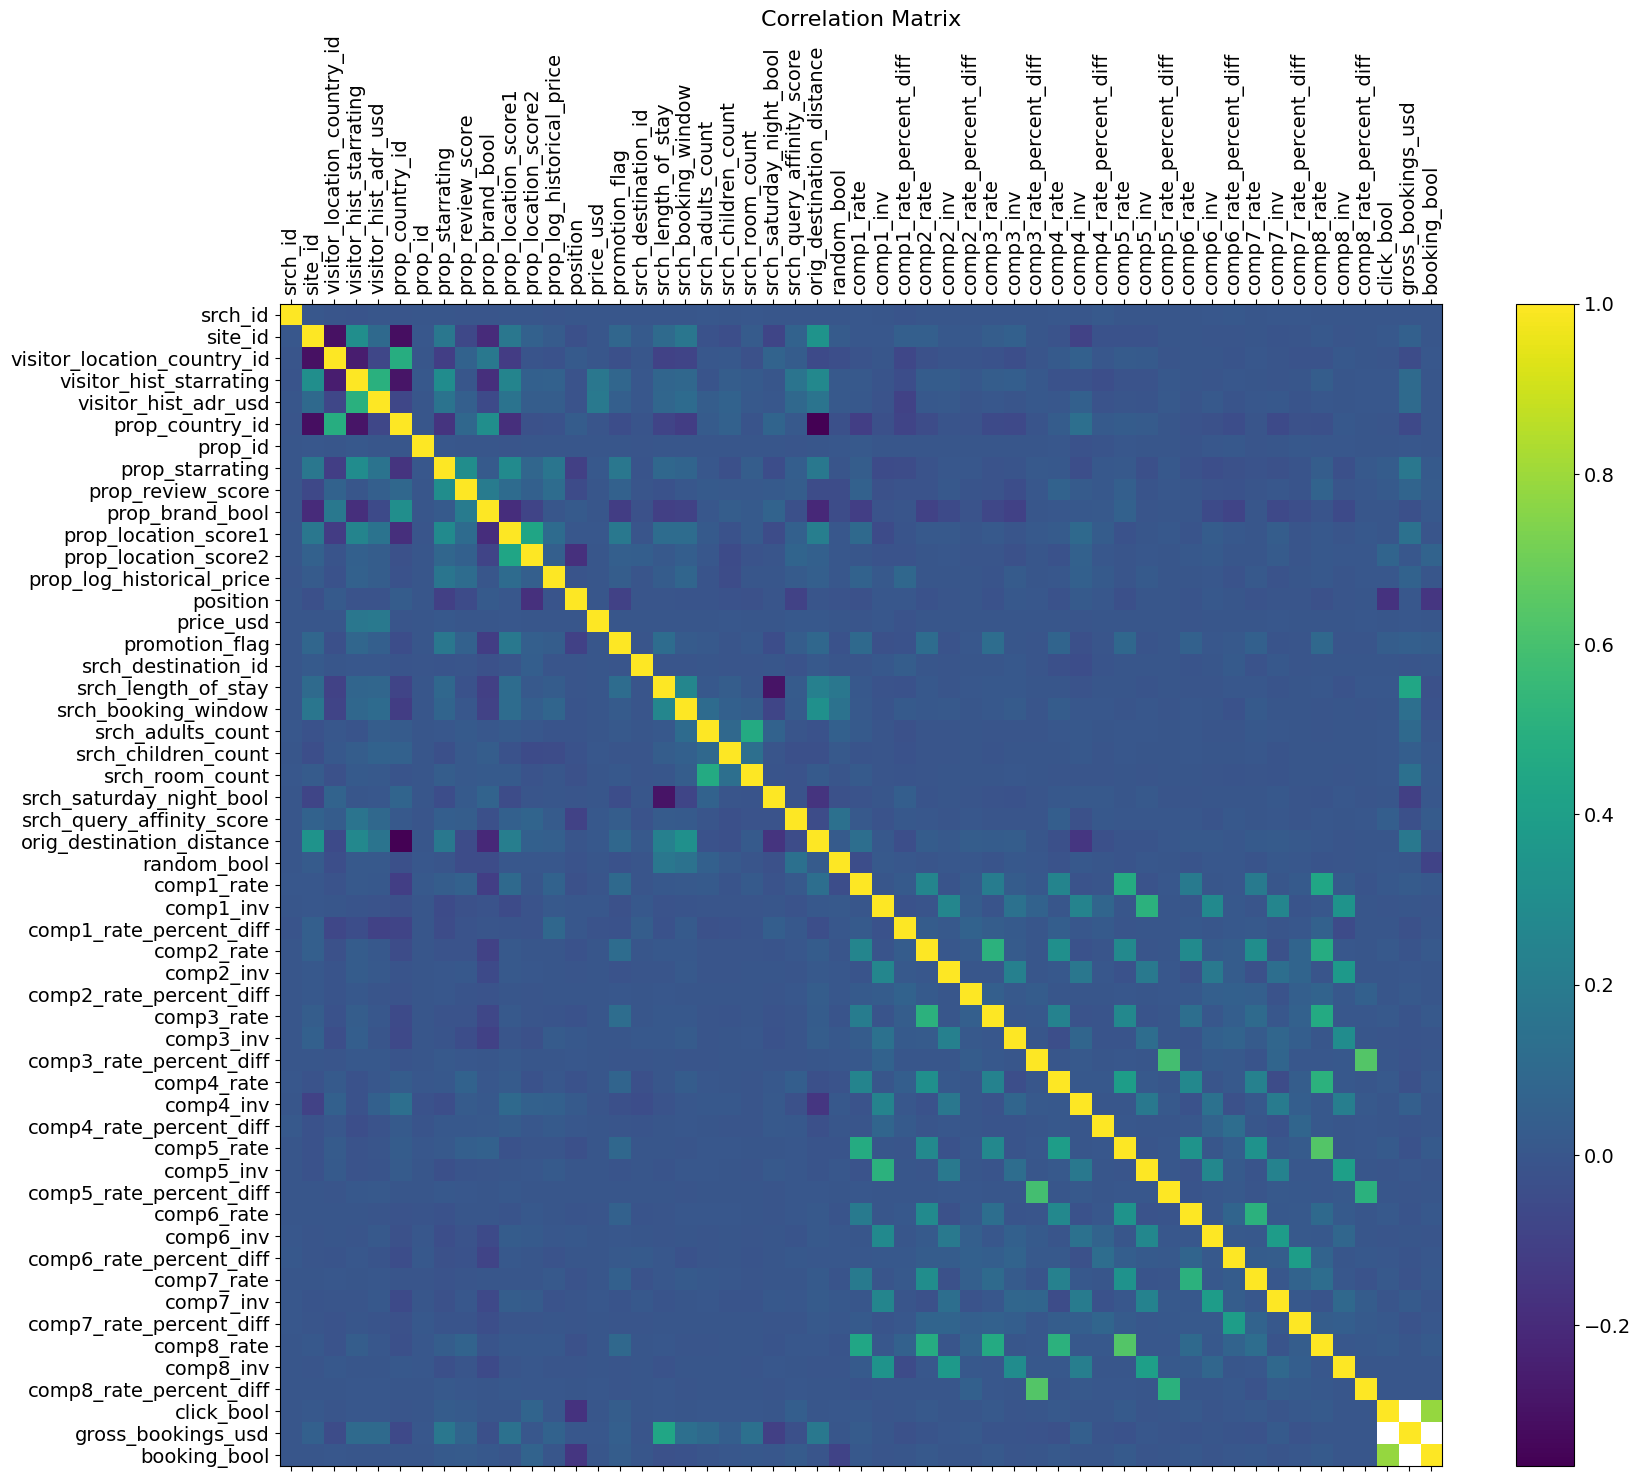

In [6]:
f = plt.figure(figsize=(19, 15))
plt.matshow(train.corr(), fignum=f.number)
plt.xticks(range(train.select_dtypes(['number']).shape[1]), train.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(train.select_dtypes(['number']).shape[1]), train.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

C:\Users\niels\AppData\Local\Temp\ipykernel_19912\4247392311.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(test.corr(), fignum=f.number)


Text(0.5, 1.0, 'Correlation Matrix')

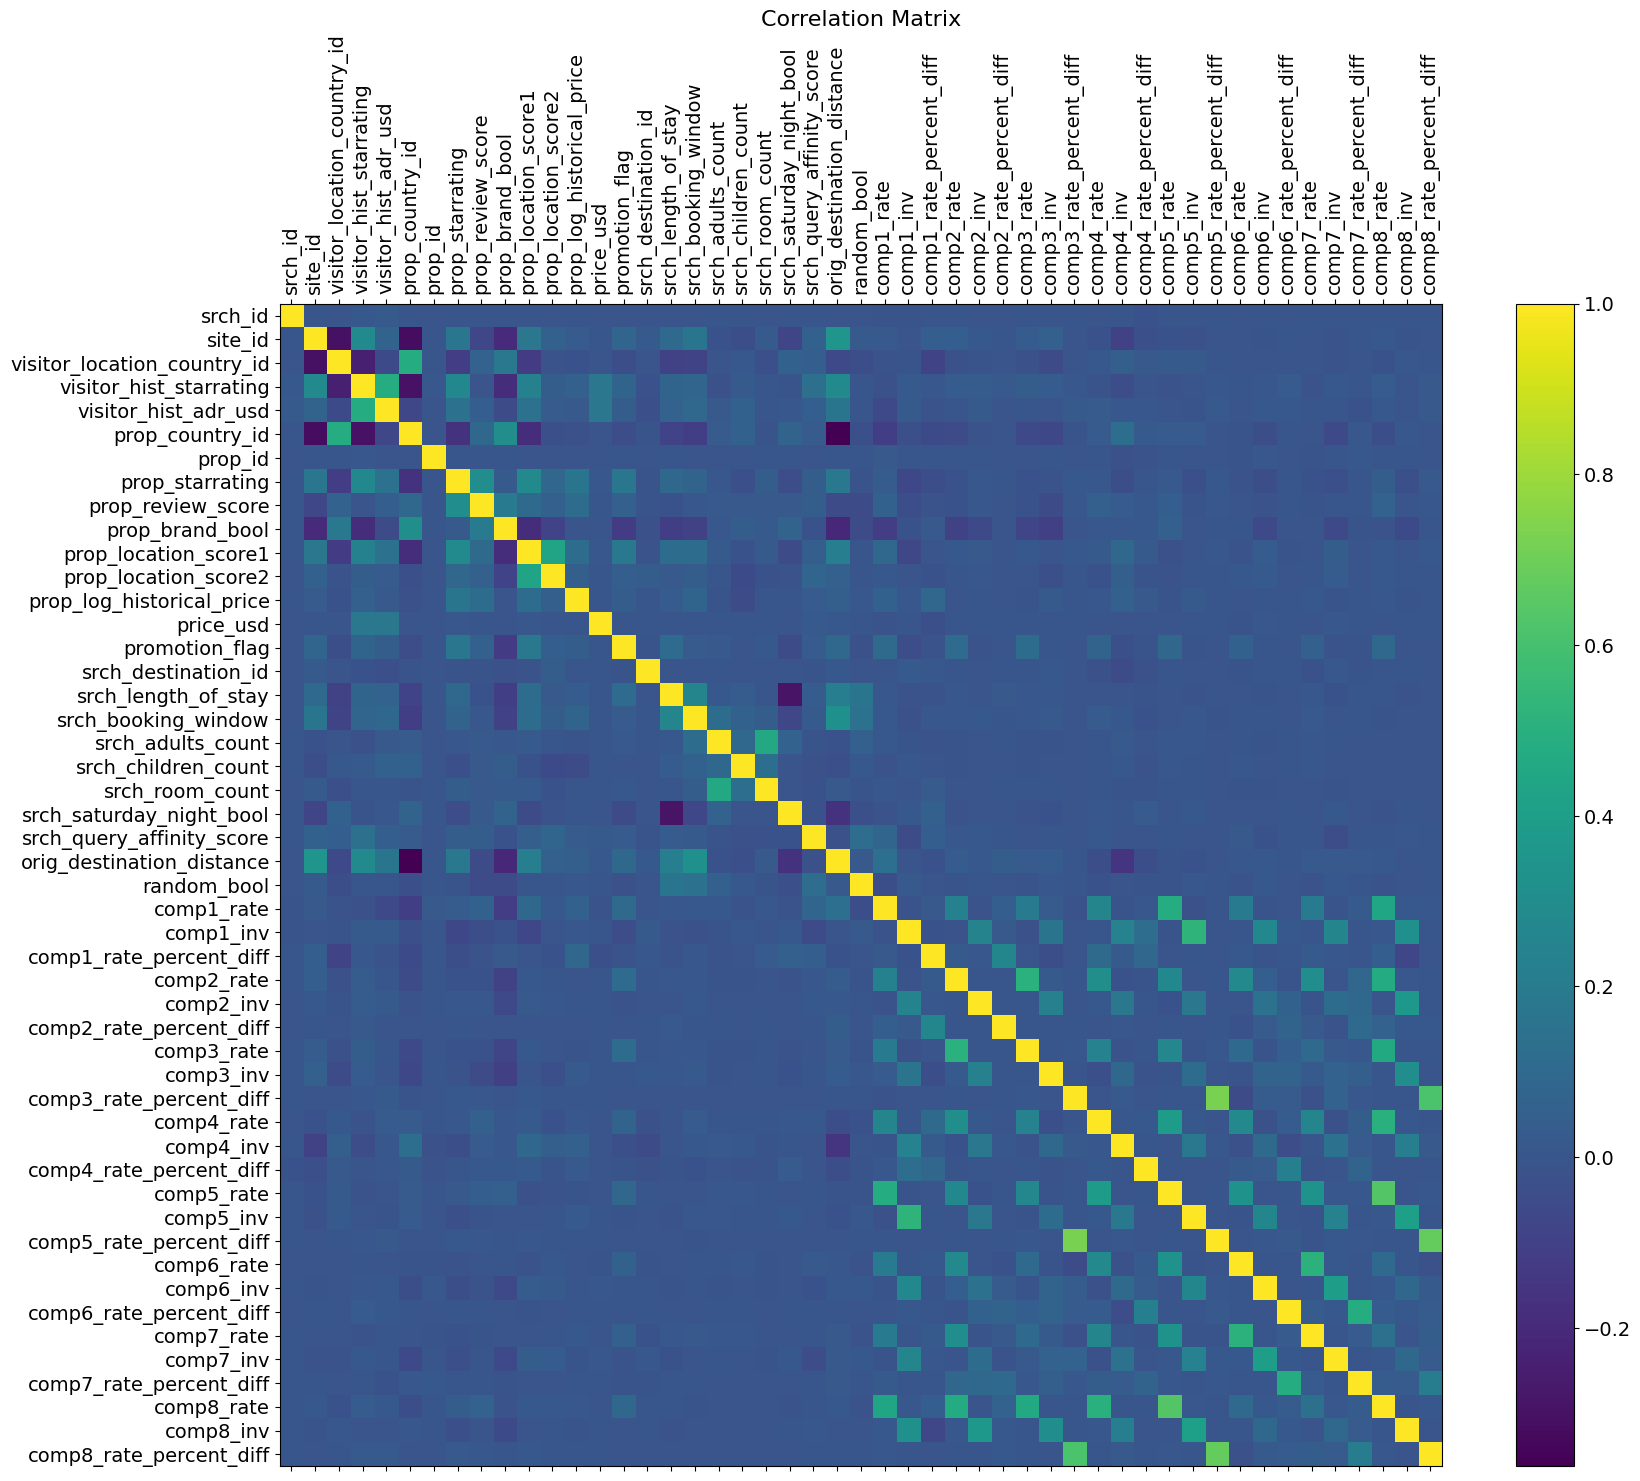

In [7]:
f = plt.figure(figsize=(19, 15))
plt.matshow(test.corr(), fignum=f.number)
plt.xticks(range(test.select_dtypes(['number']).shape[1]), test.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(test.select_dtypes(['number']).shape[1]), test.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

### Promotion flag by position (I changed it to mean, because of unbalanced nature)

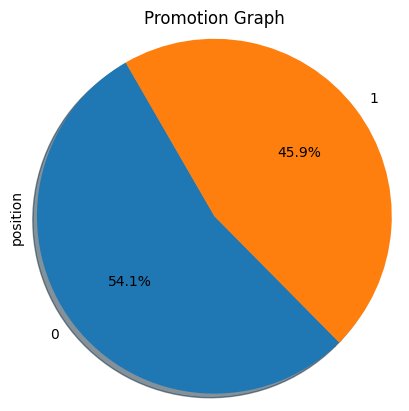

In [20]:
# Sum of the positions by promotion flag --> 45.9% indicates 45.9% of sum(positions) belongs to promotion flag 1 --> higher rank on average
train[["promotion_flag","position"]].groupby("promotion_flag").mean().position.plot(kind="pie",shadow=True,autopct="%1.1f%%",radius=1.2,startangle=120)
plt.title("Promotion Graph")
plt.show()

### Position by prop_brand_bool (changed it to mean)

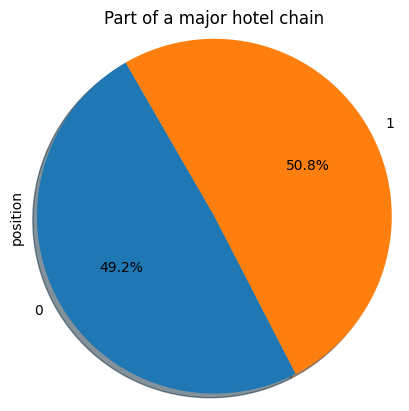

In [12]:
train[["prop_brand_bool","position"]].groupby("prop_brand_bool").mean().position.plot(kind="pie",shadow=True,autopct="%1.1f%%",radius=1.2,startangle=120)
plt.title("Part of a major hotel chain")
plt.show()

srch_saturday_night_bool by position (changed it to mean)

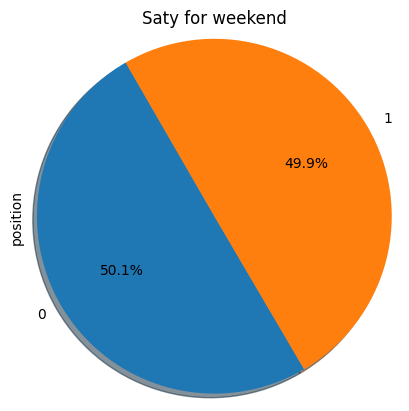

In [13]:
train[["srch_saturday_night_bool","position"]].groupby("srch_saturday_night_bool").mean().position.plot(kind="pie",shadow=True,autopct="%1.1f%%",radius=1.2,startangle=120)
plt.title("Saty for weekend")
plt.show()

Click bool by position (changed it to mean)

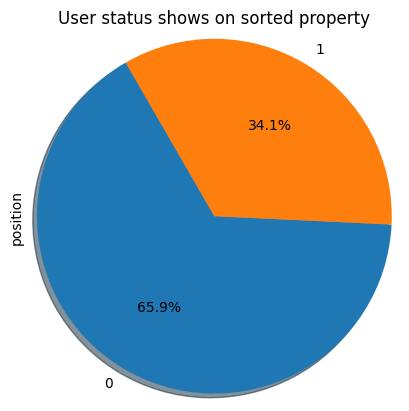

In [14]:
train[["click_bool","position"]].groupby("click_bool").mean().position.plot(kind="pie",shadow=True,autopct="%1.1f%%",radius=1.2,startangle=120)
plt.title("User status shows on sorted property")
plt.show()

Position for a booking

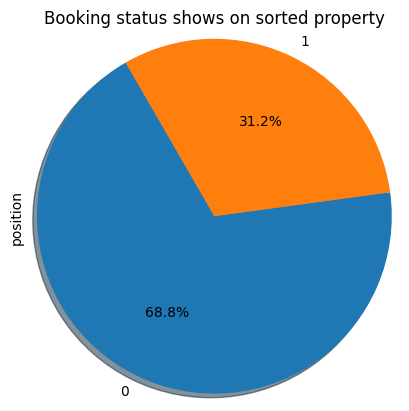

In [15]:
train[["booking_bool","position"]].groupby("booking_bool").mean().position.plot(kind="pie",shadow=True,autopct="%1.1f%%",radius=1.2,startangle=120)
plt.title("Booking status shows on sorted property")
plt.show()

Position per booking bool per random bool

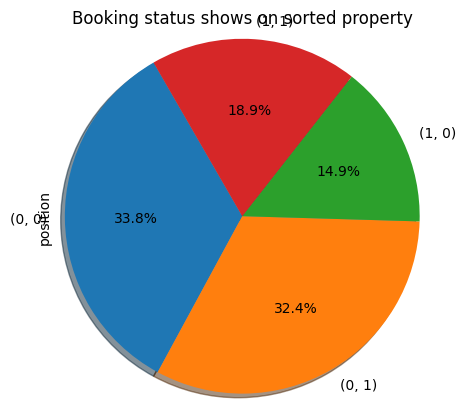

In [17]:
train[["booking_bool","random_bool", "position"]].groupby(["booking_bool", "random_bool"]).mean().position.plot(kind="pie",shadow=True,autopct="%1.1f%%",radius=1.2,startangle=120)
plt.title("Booking status shows on sorted property")
plt.show()

Position for random

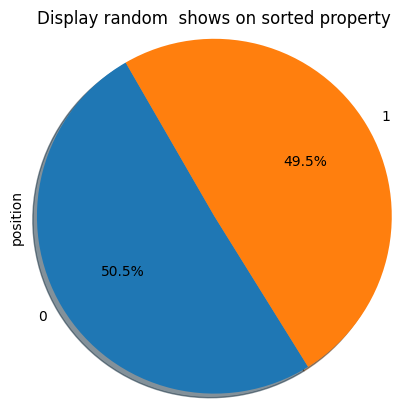

In [16]:
train[["random_bool","position"]].groupby("random_bool").mean().position.plot(kind="pie",shadow=True,autopct="%1.1f%%",radius=1.2,startangle=120)
plt.title("Display random  shows on sorted property")
plt.show()

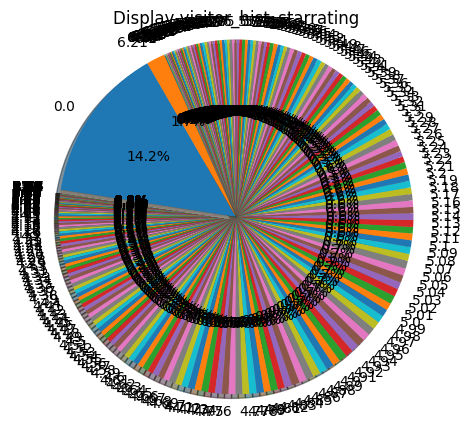

In [48]:
train[["prop_log_historical_price","position"]].groupby("prop_log_historical_price").sum().position.plot(kind="pie",shadow=True,autopct="%1.1f%%",radius=1.2,startangle=120)
plt.title("Display visitor_hist_starrating")
plt.show()

Visitor location

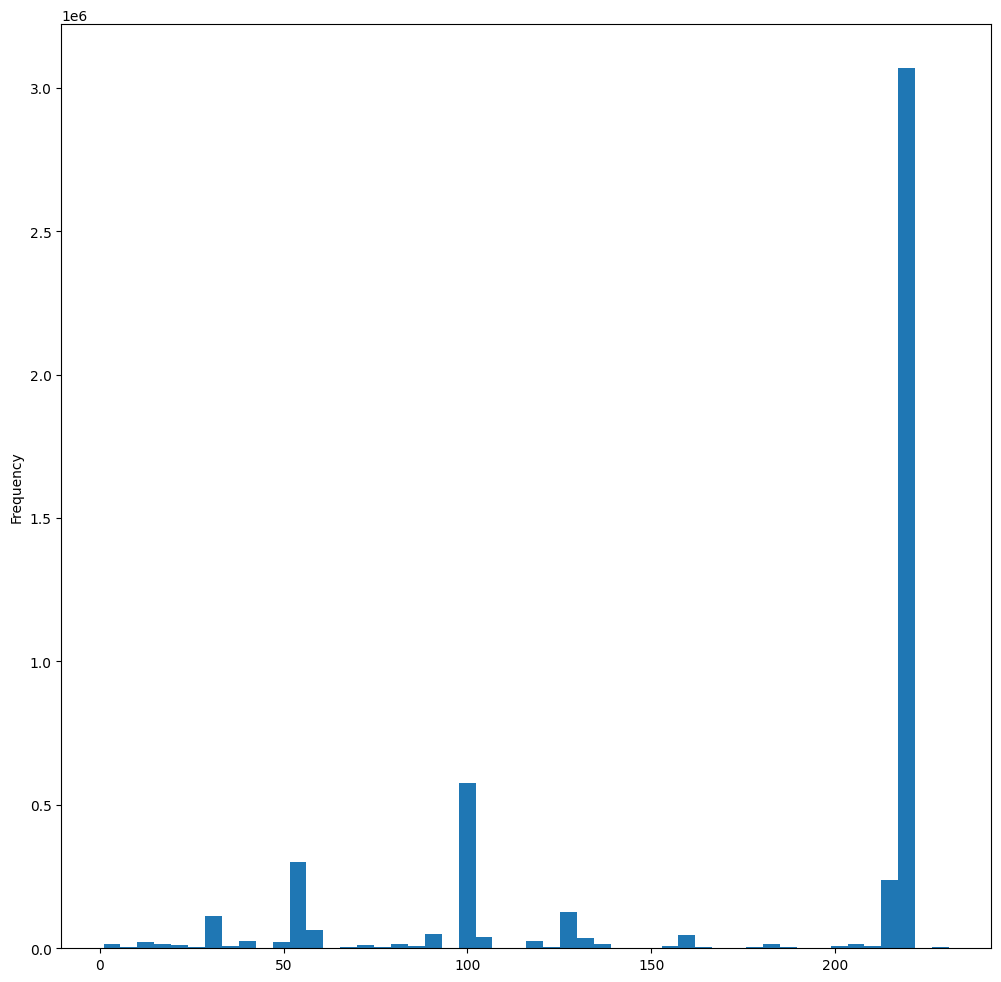

In [49]:
train.visitor_location_country_id.plot(kind = 'hist',bins = 50,figsize = (12,12))
plt.show()

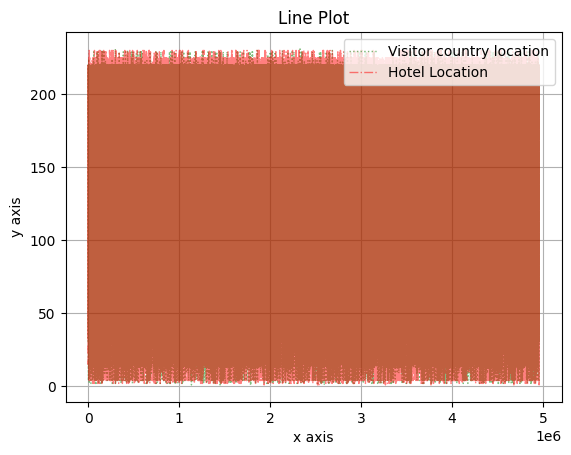

In [50]:
# Line Plot
# color = color, label = label, linewidth = width of line, alpha = opacity, grid = grid, linestyle = sytle of line
train.visitor_location_country_id.plot(kind = 'line', color = 'g',label = 'Visitor country location',linewidth=1,alpha = 0.5,grid = True,linestyle = ':')
train.prop_country_id.plot(color = 'r',label = 'Hotel Location',linewidth=1, alpha = 0.5,grid = True,linestyle = '-.')
plt.legend(loc='upper right')     # legend = puts label into plot
plt.xlabel('x axis')              # label = name of label
plt.ylabel('y axis')
plt.title('Line Plot')            # title = title of plot
plt.show()

Text(0.5, 1.0, 'visitor_location_country_id Scatter Plot')

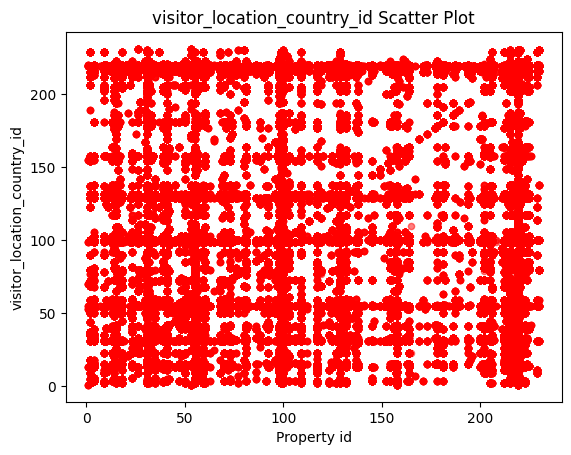

In [53]:
# Scatter Plot 
# x = attack, y = defense
train.plot(kind='scatter', x='prop_country_id', y='visitor_location_country_id',alpha = 0.5,color = 'red')
plt.xlabel('Property id')              # label = name of label
plt.ylabel('visitor_location_country_id')
plt.title('visitor_location_country_id Scatter Plot')    

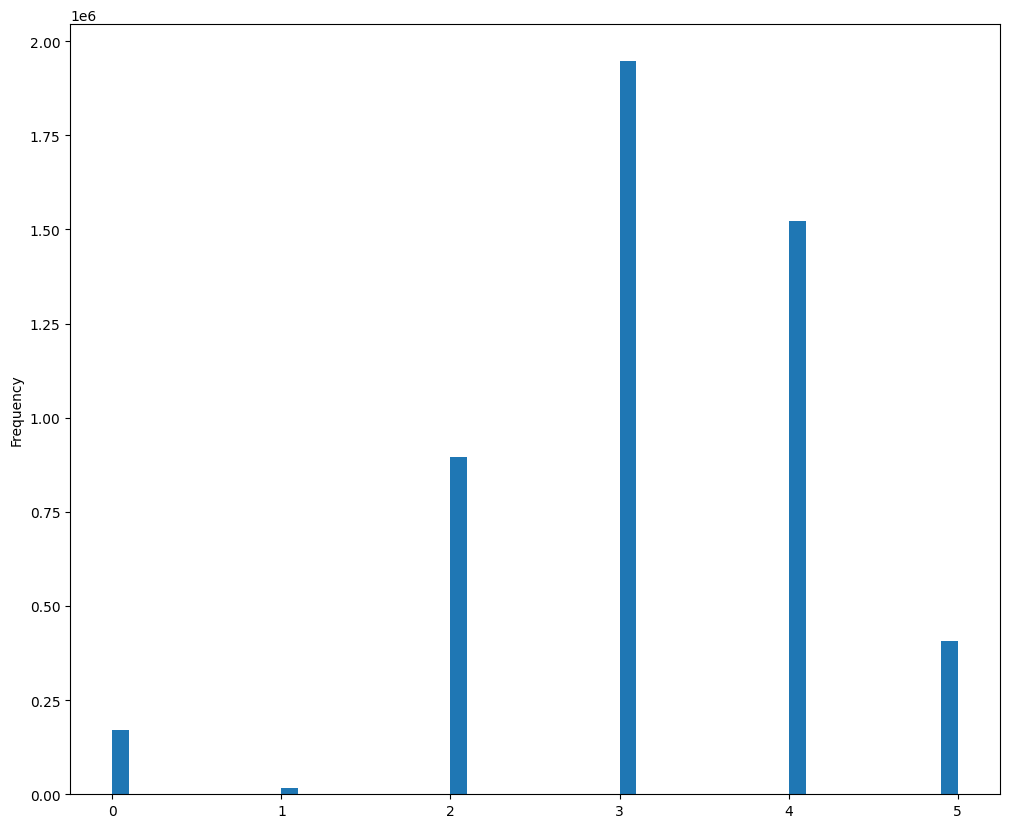

In [58]:
train.prop_starrating.plot(kind = 'hist',bins = 50,figsize = (12,10))
plt.show()

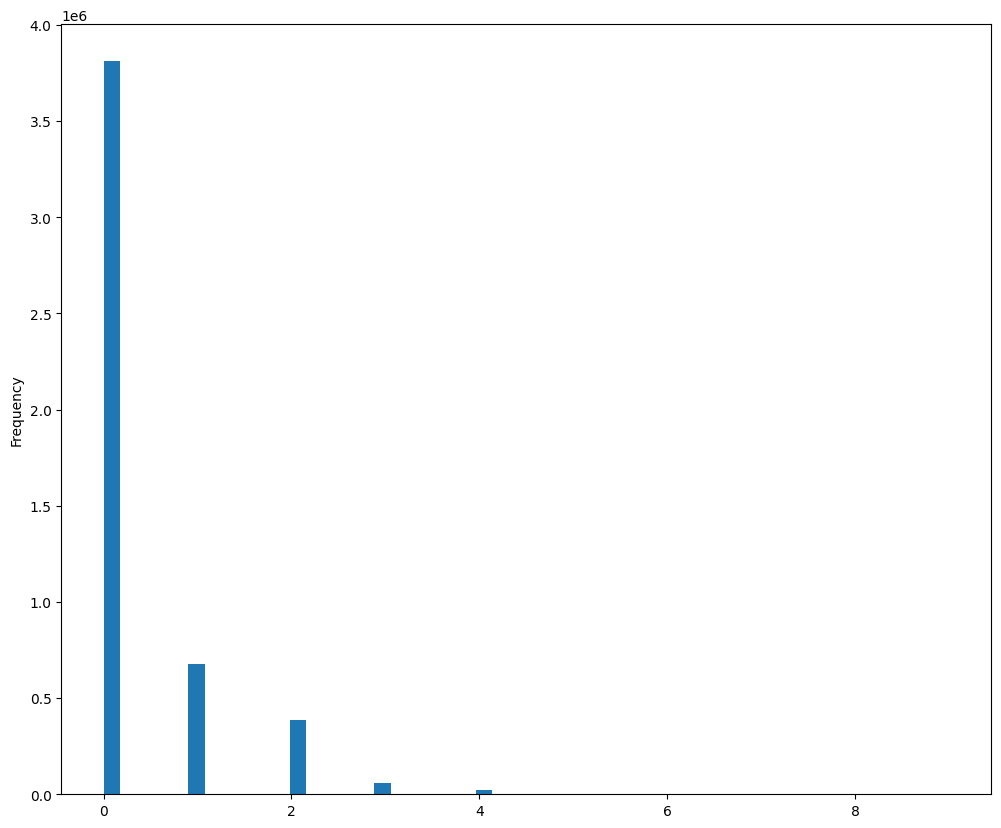

In [60]:
train.srch_children_count.plot(kind = 'hist',bins = 50,figsize = (12,10))
plt.show()

In [33]:
train.columns

Index(['srch_id', 'date_time', 'site_id', 'visitor_location_country_id',
       'prop_country_id', 'prop_id', 'prop_starrating', 'prop_brand_bool',
       'prop_location_score1', 'prop_log_historical_price', 'position',
       'price_usd', 'promotion_flag', 'srch_destination_id',
       'srch_length_of_stay', 'srch_booking_window', 'srch_adults_count',
       'srch_children_count', 'srch_room_count', 'srch_saturday_night_bool',
       'random_bool', 'click_bool', 'booking_bool'],
      dtype='object')

# Data Analysis and Visualizations


/tmp/ipykernel_34/503634475.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train.corr()


<AxesSubplot: >

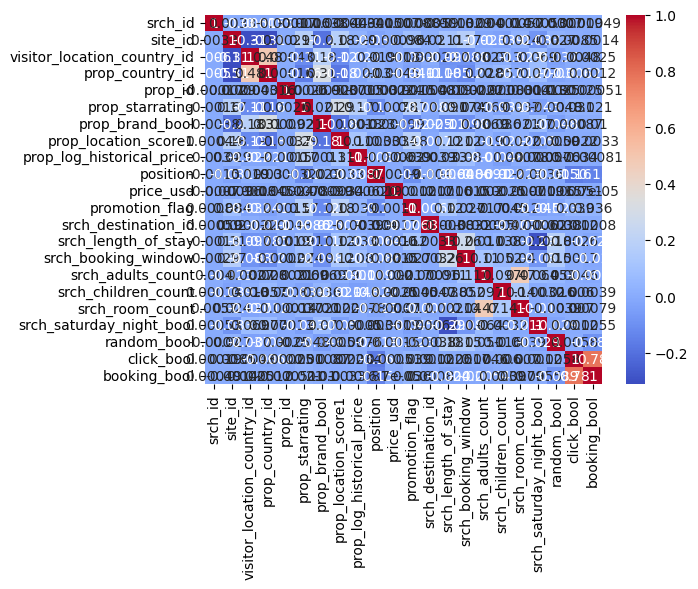

In [16]:
import seaborn as sns
import pandas as pd

# Load the data into a pandas dataframe
# data = pd.read_csv("data.csv")

# Compute the correlation matrix
corr = train.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(corr, cmap="coolwarm", annot=True)


/tmp/ipykernel_34/336935084.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = test.corr()


<AxesSubplot: >

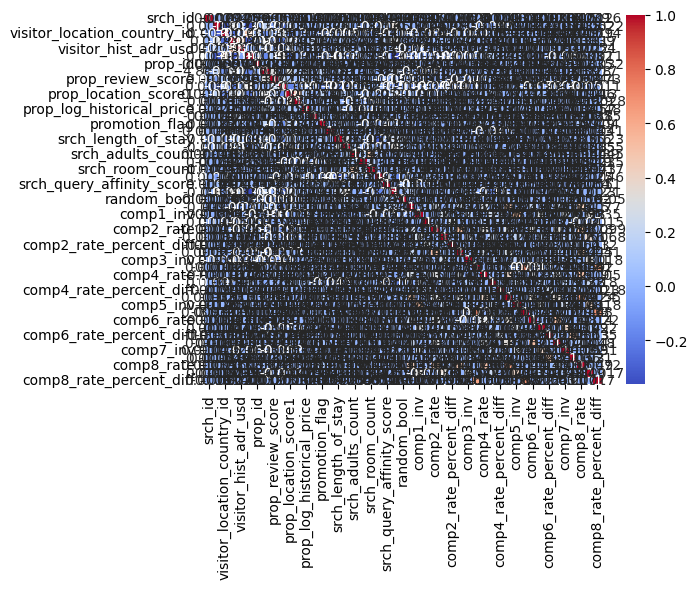

In [31]:
corr = test.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(corr, cmap="coolwarm", annot=True)